###**[Netflix Titles Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)**; ***An Analysis***

**Source:** `Kaggle Data Set`

Here is what I` plan to do` with the dataset as a part of the Final Project:

1.


`Tools I plan to use:`

1. Python
2. SQL
3. Tableau


`Additional Note:` I plan to answer the three basic questions with almost every code I use: ***The What, The Why and the How!***

###**Start with by adding the important libraries for running this analysis**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob

###Purpose of importing these libraries

1. *Numpy:* Linear algebric functions can be performed on it
2. *Pandas:* Used for data preparation
3. *Plotly.Express:* Used to data visualization
4. *Textblob:* Used for sentiment Analysis

###Importing the dataset onto Python(Google Colab)

In [ ]:
df = pd.read_csv("netflix_titles.csv")

*The data is being stored under "df" for easy reference*

In [ ]:
df.shape

(8807, 12)

*Using the code to check if the calculation matches with Excel. Rows: 8807 and Columns: 12*

###Running the head function to check first 5 rows of the dataset and get a glimpse

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*Another way of viewing columns in the dataset*

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#**Let's start the analysis**



###Checking which content is available most on Netflix(specially with the help of this data)

In [ ]:
x = df.groupby(["rating"]).size().reset_index(name="counts")
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


###***Decoding the code***

*The code performs the following actions:*

1. a) df.groupby(["rating"]): Groups the original DataFrame df by the "rating" column.
b) .size(): Computes the size of each group (i.e., counts the number of occurrences for each unique rating).
c) .reset_index(name="counts"): Resets the index of the resulting Series to convert it back into a DataFrame, with a new column named "counts" for the frequency of each rating.
`print(x): Outputs the resulting DataFrame x to display the counts of each unique rating.`
2. **The What**:
The code is used to determine the distribution of different ratings in the Netflix dataset. It counts how many times each rating appears, giving insights into the frequency of various content ratings.

3. **The Why**:
This analysis helps to understand the types of content available on Netflix, providing a snapshot of the range and popularity of content ratings. It may also help identify trends in content classification and any potential data inconsistencies, like the presence of time durations (e.g., "66 min") among ratings.

4. **The How**:
The code groups the data by the "rating" column, counts the occurrences of each unique rating, and then resets the index to convert the result into a DataFrame format with two columns: "rating" and "counts." This provides a clear view of how content is distributed across different ratings in the dataset.

**Additional Analysis**
*Data Inconsistency:* The first three rows **("66 min," "74 min," and "84 min")** are clearly time durations rather than content ratings.
This suggests that some entries in the "rating" column contain erroneous data, which needs to be cleaned or filtered out. Including durations in the ratings distribution could skew the analysis and lead to misleading conclusion

`To visualize this better, I shall create a pie chart!`

In [ ]:
pieChart = px.pie(x, values="counts", names = "rating", title= "Distribution of content ratings on Netflix" )
pieChart.show()

**I wish to use the Netflix colored based theme only for showing the Pie Chart!**

In [ ]:
# Update the color palette to match Netflix's brand colors
colors = ['#E50914', '#221f1f', '#b81d24', '#f5f5f1', '#8c8c8c',
          '#404040', '#737373', '#595959', '#d8d8d8', '#3e3e3e',
          '#ff4d4f', '#1f1f1f', '#ff7875', '#ffccc7', '#d9d9d9']

# Update the plot with Netflix colors
pieChart = px.pie(x, values="counts", names="rating",
                  title="Distribution of content ratings on Netflix",
                  color_discrete_sequence=colors)
pieChart.update_layout(
    plot_bgcolor='black',  # Set background to black
    paper_bgcolor='black',  # Set paper background to black
    font=dict(color='white')  # Set font color to white
)

pieChart.show()

###*Decoding the Code*

a) px.pie(): Creates a pie chart.
values="counts": Uses the "counts" column for the slice sizes, representing the frequency of each rating.
b) names="rating": Uses the "rating" column for the labels, displaying each content rating.
c) title="Distribution of content ratings on Netflix": Sets the chart title.
pieChart.show(): Displays the pie chart.
2. **The What**:
The pie chart visualizes the distribution of content ratings in the Netflix dataset. It shows the percentage share of each rating category, making it easier to understand the relative frequency of different types of content.

3. **The Why**:
Visualizing the distribution helps identify which ratings are most common on Netflix, revealing trends in content availability. However, the inclusion of irrelevant categories ("66 min," "74 min," "84 min") highlights data inconsistencies. These anomalies need to be addressed to avoid misleading conclusions.

4. **The How**:
The code generates a pie chart that displays the relative proportions of content ratings by using the counts from the earlier analysis. To ensure accuracy, data cleaning should be performed to exclude non-rating values before creating the final visualization.

In [ ]:
# Filter the DataFrame to exclude rows where "rating" contains time durations
# Assuming time values are in the format "NN min" (where NN is a number)
df_cleaned = df[~df['rating'].str.contains(r'^\d+\smin$', na=False)]

# Verify the cleaned DataFrame
print(df_cleaned['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' nan 'TV-Y7-FV' 'UR']


*Removed the extra information with the help of the above code!*

##In the dataframe, "Director" column has NaN; so I will now go onto that column and fill that up

In [ ]:
df["director"] = df["director"].fillna("Director Not Specified")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Specified,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*Decoding the Code*
df['director'] = df['director'].fillna("Director Not Specified"): This line replaces any NaN values in the "director" column with the string "Director Not Specified".
df.head(): Displays the first few rows of the DataFrame to verify the changes.
2. **The What**:
The code fills in missing values in the "director" column with a placeholder value ("Director Not Specified") to ensure consistency in the data. This step helps avoid issues during analysis where missing values might otherwise cause problems.

3. **The Why**:
Handling missing values is important for data quality and analysis accuracy. By replacing NaN values with a descriptive placeholder, you can maintain the integrity of the dataset and avoid errors in any operations that involve the "director" column. It also provides a clear indication that the director information is not available for some entries.

4. **The How**:
The .fillna() function is used to fill the missing values in the specified column. By specifying "Director Not Specified", all rows with NaN in the "director" column are updated with this placeholder, making the data more complete for further analysis.

In [ ]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


###Decoding the code:

*Directors_list: has no columns and no Index*

**Next step:** Fill the data in it!



In [ ]:
directors_list = df["director"].str.split(",", expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director Not Specified
2     0           Julien Leclercq
3     0    Director Not Specified
4     0    Director Not Specified
                    ...          
8802  0             David Fincher
8803  0    Director Not Specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


###Decoding the Code
a) Creating an Empty DataFrame: directors_list = pd.DataFrame() creates an empty DataFrame with no columns or rows. This is shown by the initial print statement, which confirms that directors_list is empty.
b) Splitting the "director" Column: The line directors_list = df["director"].str.split(",", expand=True).stack() performs a series of operations:
df["director"].str.split(",", expand=True): Splits the "director" column's values by commas, expanding the result into multiple columns if there are multiple directors listed. For example, if a movie has two directors listed as "John Doe, Jane Smith," this will create two separate columns.
.stack(): Stacks the resulting DataFrame, converting the split columns into a single column of individual directors. This collapses the data into a Series where each entry corresponds to one director, effectively flattening the structure.
2. **The What**:
The code is used to transform the "director" column into a format where each director is represented in its own row, even if they were originally listed together in a single entry. This allows for easier analysis of individual directors.

3. **The Why**:
Splitting the "director" column helps in analyzing the data at a more granular level, especially if a movie has multiple directors. It allows you to count occurrences of individual directors, perform specific analyses on directors' work, and gain insights into collaborations.

4. **The How**:
The process first splits the directors into separate columns if they are listed together, then consolidates the results back into a single column format where each director appears in a separate row. This results in a stacked structure, where the index may reflect the original DataFrame's structure, but the content focuses on individual directors.

In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director Not Specified
2    0         Julien Leclercq
3    0  Director Not Specified
4    0  Director Not Specified
...                        ...
8802 0           David Fincher
8803 0  Director Not Specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


####This converted the data into rows and columns and shows it has 9,612 rows and 1 column. But, sows the Column Name as "0".



```
This has been created into a data frame!
```




In [ ]:
directors_list.columns = ["Directors"]

In [ ]:
print(directors_list)

                     Directors
0    0         Kirsten Johnson
1    0  Director Not Specified
2    0         Julien Leclercq
3    0  Director Not Specified
4    0  Director Not Specified
...                        ...
8802 0           David Fincher
8803 0  Director Not Specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


With the help of the above code- I was able to rename the column to **"Directors"** which was earlier appearing as **"0"**

In [ ]:
directors = directors_list.groupby(["Directors"]).size().reset_index(name= "Total Count")

In [ ]:
print(directors)

                      Directors  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


#Decode:
The code provided groups the directors_list DataFrame by the "Directors" column and then calculates the size of each group. The results are then reset to a new DataFrame with two columns: "Directors" and "Total Count."

###**What:**
This code creates a summary table that shows the total number of occurrences for each director in the directors_list DataFrame. The groupby function groups the data based on unique "Directors" values, the size() function calculates the count of occurrences within each group, and reset_index converts the grouped results back into a DataFrame with "Directors" and "Total Count" columns.

###**Why:**
The purpose of this code is to count how many times each director appears in the original dataset and create a summary table that displays these counts. This is useful for analyzing which directors have contributed the most frequently or appeared most often in the dataset.

###**How:**

directors_list.groupby(["Directors"]) groups the data by the "Directors" column, creating a group for each unique director name.
.size() counts the number of entries in each group (i.e., the total number of occurrences for each director).
.reset_index(name="Total Count") converts the result into a new DataFrame, where "Directors" is retained as a column and the counts are assigned to a column named "Total Count."

In [ ]:
directors = directors[directors.Directors != "Director Not Specified"]

Remove Directors not found, as I want to remove that from my analysis!

In [ ]:
print(directors)

                      Directors  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


This shows `5120 rows and 1 row` got eliminated which clearly was **"Director Not Specified"**

In [ ]:
directors = directors.sort_values(by=["Total Count"], ascending=False)
print(directors)

            Directors  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


The purpose of the code was to sort data in the `descending order.`

In [ ]:
top5Directors = directors.head()
print(top5Directors)

          Directors  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


###**Decode:**
The code filters the first five rows of the directors DataFrame and assigns them to a new DataFrame named top5Directors. Then, it displays this subset using the print() function.

###**What:**
This code is used to get the top 5 directors based on the count of occurrences from the previously created directors DataFrame. It shows the names of the top 5 directors and their respective total counts of appearances in the dataset.

###**Why:**
The purpose of this code is to identify the most frequent directors in the dataset. This helps us understand which directors are the most prominent or prolific according to the data.

###**How:**

directors.head() retrieves the first five rows of the directors DataFrame, which are the top entries sorted by the total count.
The result is assigned to a new DataFrame named top5Directors.
print(top5Directors) outputs the top 5 directors along with their respective "Total Count" values, showing their prominence in the data.

In [ ]:
top5Directors = top5Directors.sort_values(by=["Total Count"])
barChart = px.bar(top5Directors, x="Directors", y="Total Count", title= "Top 5 Directors on Netflix")
barChart.show()

Looks amazing, but I want the theme to be netflix!

In [ ]:
# Update the bar color and background
barChart.update_traces(marker_color='red')  # Set the bar color to red
barChart.update_layout(
    plot_bgcolor='black',   # Set the plot background to black
    paper_bgcolor='black',  # Set the paper background to black
    font_color='white',     # Set the font color to white for contrast
    title_font=dict(size=20) # Optional: Adjust title font size if needed
)

### **Decode**
The bar chart visualizes the top 5 directors with the highest total count of their works available on Netflix. The graph uses red bars against a black background, adhering to Netflix's signature color theme. The y-axis shows the total count of works for each director, while the x-axis lists the directors' names.

### **What**
The chart presents the top five directors with the most content on Netflix. The total count represents how many works (films, shows, etc.) attributed to each director are available on the platform. The color scheme aims to enhance visual appeal while aligning with Netflix's brand identity.

### **Why**
This bar chart helps identify the most prolific directors on Netflix. Understanding which directors have the most content can offer insights into content `availability, director popularity, or potentially drive user engagement` by promoting these directors' works. The color and background customization adds brand consistency, making the visualization suitable for presentations or reports connected to Netflix.

### **How**
1. *Data Preparation*: The data was grouped to count the number of works for each director and then sorted to identify the top five.
1. *Chart Creation*: Using Plotly Express, a bar chart was generated with the directors as the x-axis and the total count as the y-axis.
1. *Customization*: The bar color was set to red (marker_color='red'), and both the plot and paper background colors were changed to black (plot_bgcolor='black' and paper_bgcolor='black'). The font color was adjusted to white for readability against the black background.

###Analyzing the Top 5 Actors on Netflix

In [ ]:
df["cast"]= df["cast"].fillna("No Cast Specified")
cast_df = pd.DataFrame()
cast_df= df["cast"].str.split(",", expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ["Actor"]
actors = cast_df.groupby(["Actor"]).size().reset_index(name= "Total Count")
actors = actors[actors.Actor != "No Cast Specified"]
actors = actors.sort_values(by=["Total Count"], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=["Total Count"])
barChart2 = px.bar(top5Actors, x="Actor", y="Total Count", title="Top 5 Actors on Netflix")
barChart2.show()

**Decoding the Code**
Filling Missing Values: df["cast"] = df["cast"].fillna("No Cast Specified") fills any missing values in the "cast" column with the string "No Cast Specified."

Creating a DataFrame for Cast: cast_df = pd.DataFrame() initializes an empty DataFrame to store cast members.
Splitting Cast Names: cast_df = df["cast"].str.split(",", expand=True).stack() splits the "cast" column by commas (for multiple cast members) and stacks them into a single column, creating one row per cast member.

Converting to DataFrame Format: cast_df = cast_df.to_frame() converts the stacked Series into a DataFrame.
Naming the Column: cast_df.columns = ["Actor"] names the single column as "Actor."

Counting Appearances: actors = cast_df.groupby(["Actor"]).size().reset_index(name="Total Count") groups by "Actor" and counts each actor’s occurrences, renaming the count column to "Total Count."

Removing Placeholder Rows: actors = actors[actors.Actor != "No Cast Specified"] filters out entries where "Actor" is "No Cast Specified."
Sorting Actors: actors = actors.sort_values(by=["Total Count"], ascending=False) sorts the actors in descending order by their total count of appearances.

Selecting Top 5: top5Actors = actors.head() selects the top 5 actors based on their count.
Sorting for Plotting: top5Actors = top5Actors.sort_values(by=["Total Count"]) sorts the top 5 actors again by "Total Count" for display order.
Plotting Bar Chart: barChart2 = px.bar(top5Actors, x="Actor", y="Total Count", title="Top 5 Actors on Netflix") creates a bar chart with Plotly Express to display the top 5 actors by count.

Displaying the Chart: barChart2.show() shows the bar chart.

2. **The What**:
This code identifies and visualizes the top 5 actors who appear most frequently in Netflix titles. It handles missing values, splits multiple cast members, counts occurrences, and then creates a bar chart to display the results.

3. **The Why**:
Analyzing the most frequently appearing actors on Netflix helps identify popular or frequently featured talent in Netflix’s library. It can provide insights into casting trends and potentially reflect the actors' demand or popularity within the platform.

4. **The How**:
The code fills missing "cast" values, splits multiple names, groups by individual actors, counts appearances, and then filters for the top 5 actors. The results are then visualized in a bar chart, showing the actors and their total appearances. This process provides a clear visual of the most common actors in Netflix titles.

`Converting the chart into Netflix theme `

In [ ]:
# Custom colors for Netflix palette
netflix_colors = ["#E50914", "#B3B3B3", "#221F1F", "#000000", "#E50914"]

In [ ]:
# Creating the bar chart with custom colors
barChart2 = px.bar(
    top5Actors,
    x="Actor",
    y="Total Count",
    title="Top 5 Actors on Netflix",
    color_discrete_sequence=netflix_colors  # Applying custom color palette
)

In [ ]:
# Update layout for Netflix-style background
barChart2.update_layout(
    plot_bgcolor="#000000",  # Black background for the plot area
    paper_bgcolor="#000000",  # Black background for the entire chart
    font=dict(color="#E50914"),  # Netflix red font color for text
    title_font=dict(size=24, color="#E50914")  # Larger red font for title
)

###*Analysing content produced on Netlfix based on the Years*

Creating one data frame

In [ ]:
df1 = df[["type", "release_year"]]
df1 = df1.rename(columns={"release_year": "Release Year","type": "Type"})


Creating yet another data frame

In [ ]:
df2 = df1.groupby(["Release Year", "Type"]).size().reset_index(name="Total Count")

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


###Decoding the Code
df[["type", "release_year"]]: This selects only the "type" and "release_year" columns from the original df DataFrame and creates a new DataFrame df1 with just those columns.

`.rename(columns={"release_year": "Release Year", "type": "Type"}):` Renames the "release_year" column to "Release Year" and "type" column to "Type" for clarity and consistency in the new DataFrame.

`df1.groupby(["Release Year", "Type"]):` Groups the df1 DataFrame by "Release Year" and "Type" (e.g., "Movie" or "TV Show").

`.size():` Calculates the size of each group, effectively counting the number of occurrences for each combination of "Release Year" and "Type."

`.reset_index(name="Total Count"):` Resets the index to convert the result back into a DataFrame and renames the count column to "Total Count."

2. **The What**
This code creates two DataFrames:

`df1:` Contains only the "Type" and "Release Year" columns from the original data, with clear column names.
`df2:` Contains aggregated data, showing the count of each "Type" (Movie or TV Show) by release year, providing the total number of entries per year and type.

3. **The Why**
By grouping the data by "Release Year" and "Type" and counting occurrences, you gain insights into the production trends over time. This approach can help you see how many movies and TV shows Netflix has produced or released each year, highlighting any patterns or growth in content production.

4. **The How**
First, df1 is created to keep only the relevant columns ("type" and "release_year") and give them clear, user-friendly names.
Next, df2 is created by grouping df1 by year and type, counting the number of entries in each group, and resetting the index for a tabular format. The result (df2) is a DataFrame that shows the total count of movies and TV shows released each year, making it easy to visualize trends in Netflix content production.



In [ ]:
df2 = df2[df2["Release Year"]>=2000]

graph = px.line(df2, x="Release Year", y="Total Count", color="Type", title = "Trend of Content Produced on Netfix Every Year")
graph.show()

###Decoding the Code

px.line(): Creates a line chart using Plotly Express.
df2: The DataFrame containing the data to be plotted. It includes "Release Year," "Type" (TV Show or Movie), and "Total Count."
x="Release Year": Sets the x-axis to represent the "Release Year" column.
y="Total Count": Sets the y-axis to represent the "Total Count" column, showing the number of titles produced each year.
color="Type": Colors the lines by "Type," creating separate lines for "TV Show" and "Movie."
title="Trend of Content Produced on Netflix Every Year": Sets the chart title.

2. The What
This code generates a line chart that shows the trend in Netflix content production over time, with separate lines for TV Shows and Movies. It reveals changes in production volume over the years.

3. The Why
This visualization is useful for understanding Netflix’s content production trends over time, including when they began producing more content and any shifts between TV shows and movies.

4. The How
The code creates a line chart by plotting the "Release Year" on the x-axis and "Total Count" on the y-axis. The "Type" column defines two separate lines, distinguishing between movies and TV shows.





In [ ]:
# Netflix color palette
netflix_colors = ["#E50914", "#B3B3B3"]  # Red for Movie, Light Gray for TV Show

In [ ]:
# Creating the line chart with custom Netflix colors and black background
graph = px.line(
    df2,
    x="Release Year",
    y="Total Count",
    color="Type",
    title="Trend of Content Produced on Netflix Every Year",
    color_discrete_sequence=netflix_colors  # Apply Netflix colors
)

In [ ]:
# Updating layout for Netflix-style appearance
graph.update_layout(
    plot_bgcolor="#000000",  # Set plot area background to black
    paper_bgcolor="#000000",  # Set entire chart background to black
    font=dict(color="#E50914"),  # Netflix red for text
    title_font=dict(size=24, color="#E50914")  # Red title font for Netflix theme
)

`As always changing the pallette of the chart to netflix's theme from the year 2000.`

#**Sentiment Analysis of Netflix Content**

In [ ]:
# Select only the relevant columns
df3 = df[["release_year", "description"]]

# Rename columns for consistency
df3 = df3.rename(columns={"release_year": "Release Year", "description": "Description"})

# Add a new column for sentiment analysis
sentiments = []
for index, row in df3.iterrows():
    # Perform sentiment analysis on the description
    description_text = row["Description"]
    testimonial = TextBlob(description_text)
    polarity = testimonial.sentiment.polarity

    # Classify sentiment based on polarity
    if polarity == 0:
        sentiments.append("Neutral")
    elif polarity > 0:
        sentiments.append("Positive")
    else:
        sentiments.append("Negative")



In [ ]:
# Add the sentiment data to the DataFrame
df3["Sentiment"] = sentiments

# Group by Release Year and Sentiment, then count occurrences
df3 = df3.groupby(["Release Year", "Sentiment"]).size().reset_index(name="Total Count")

# Filter data to include only Release Year after 2005
df3 = df3[df3["Release Year"] > 2005]

# Define Netflix color palette
netflix_palette = {"Positive": "#E50914", "Neutral": "#B3B3B3", "Negative": "#221F1F"}

# Create a bar chart with sentiment analysis and Netflix colors
barGraph = px.bar(
    df3,
    x="Release Year",
    y="Total Count",
    color="Sentiment",
    title="Sentiment Analysis of Content Descriptions by Year",
    color_discrete_map=netflix_palette  # Apply Netflix color palette
)

# Update layout for Netflix-style appearance
barGraph.update_layout(
    plot_bgcolor="#000000",         # Black background for plot area
    paper_bgcolor="#000000",        # Black background for entire chart
    font=dict(color="#E50914"),     # Netflix red for text and labels
    title_font=dict(size=24, color="#E50914")  # Larger red title font
)

# Display the customized chart
barGraph.show()

**1. Decoding the Code**

*Data Preparation:*

I extracted the release_year and description columns from the original DataFrame.
I performed sentiment analysis on the description column using TextBlob, categorizing each description as "Positive," "Neutral," or "Negative" based on the polarity score.
I added these sentiment classifications to the DataFrame.
Grouped the data by "Release Year" and "Sentiment" and counted the occurrences, giving us the Total Count of each sentiment type per year.
Filtered the data to include only records with a release year after 2005.
Visualization:

I created a bar chart (px.bar) to show the sentiment analysis results.
Applied a custom Netflix-inspired color palette where:
"Positive" is red (#E50914),
"Neutral" is light gray (#B3B3B3),
"Negative" is dark gray (#221F1F).
Set the background color of the plot and paper to black and used red (#E50914) for the font and title to align with the Netflix theme.

**2. The What**
This chart visualizes the sentiment analysis of Netflix content descriptions over the years (from 2006 onwards). The x-axis represents the release year, and the y-axis shows the total count of content descriptions. Each sentiment type (Positive, Neutral, Negative) is represented by different colors, stacked within each year to provide a breakdown of sentiment proportions.

**3. The Why**
The purpose of this analysis is to understand how the tone of Netflix content descriptions has evolved over the years. By examining the distribution of *positive, neutral, and negative sentiments*, we gain insights into potential shifts in content themes or marketing strategies. For instance, a rising trend in positive sentiment could indicate more optimistic or uplifting content descriptions, while a high count of negative or neutral sentiments could point toward different themes or content tones.

**4. The How**
Sentiment Analysis: I used TextBlob to assess the polarity of each description. Polarity scores were categorized as:

Positive if the score > 0,
Neutral if the score = 0,
Negative if the score < 0.
Grouping and Counting: Grouped the data by year and sentiment type, then counted the number of entries per group to get a breakdown of sentiment per year.

Styling: Applied a Netflix-themed palette, setting a black background for contrast, with red for positive sentiments, dark gray for negative, and light gray for neutral. This enhances the chart’s readability while aligning with Netflix's brand colors.

#**Some useful insights on Sentiment Analysis**

1. **Increase in Content Production:** There’s a clear upward trend in the total count of content descriptions from 2006 to 2019, with a peak around 2018-2019. This suggests a significant increase in content production during this period, reflecting Netflix’s rapid expansion of its catalog.

2.**Dominance of Positive Sentiment**: The majority of content descriptions show a positive sentiment (in red). This could indicate that Netflix tends to market its content with an optimistic or appealing tone, likely to attract viewers by emphasizing positive aspects or themes.

3. **Fluctuations in Neutral and Negative Sentiments:** Neutral and negative sentiments, while present, are comparatively less common. However, there’s a noticeable increase in neutral sentiment in recent years. This might suggest a shift toward more objective or balanced descriptions, possibly in response to the changing preferences of viewers who value straightforward descriptions.

4. **Decline After 2019:** There’s a sharp decline in content descriptions after 2019. This may be due to various factors, such as a strategic shift in content release frequency or the impact of external events like the COVID-19 pandemic, which affected production schedules globally.

5. **Higher Proportion of Negative Sentiments in Recent Years:** While still small, the presence of negative sentiments (in dark gray) has become more noticeable in recent years. This could reflect an increase in `darker or more serious content themes`, such as thrillers or documentaries that address challenging subjects.

6. **Consistency in Positive Sentiment Proportions:** Despite fluctuations in total content counts, the proportion of positive sentiment remains relatively high across all years. This suggests that Netflix consistently maintains a positive tone in descriptions, likely as a part of its branding and marketing strategy to maintain viewer interest.

###**Missing Value Analysis**

In [ ]:
# Step 1: Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display the missing data overview
print(missing_df)


                    Column  Missing Values  Missing Percentage
country            country             831            9.435676
date_added      date_added              10            0.113546
rating              rating               4            0.045418
duration          duration               3            0.034064
show_id            show_id               0            0.000000
type                  type               0            0.000000
title                title               0            0.000000
director          director               0            0.000000
cast                  cast               0            0.000000
release_year  release_year               0            0.000000
listed_in        listed_in               0            0.000000
description    description               0            0.000000


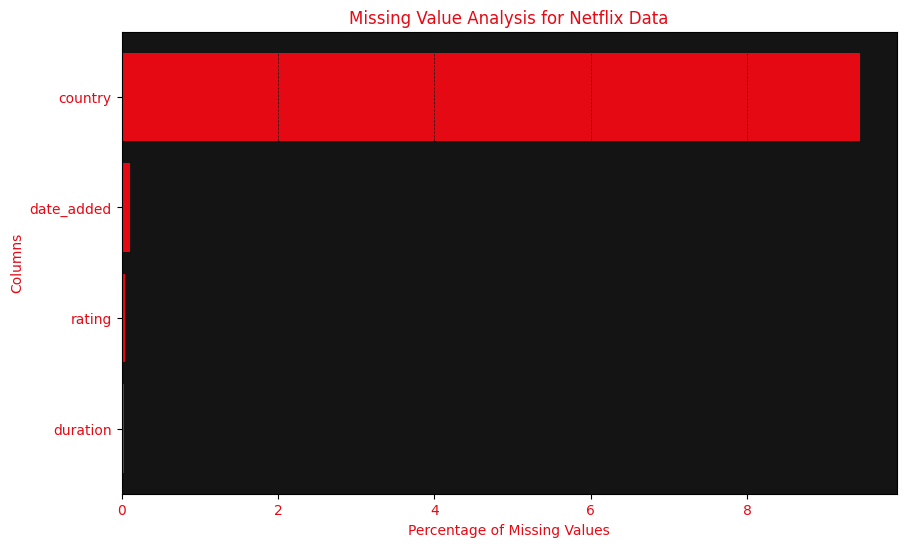

In [ ]:
import matplotlib.pyplot as plt

# Filter columns with missing values > 0
missing_df_filtered = missing_df[missing_df['Missing Values'] > 0]

# Netflix colors for the visualization
netflix_red = "#E50914"
netflix_black = "#141414"

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(missing_df_filtered['Column'], missing_df_filtered['Missing Percentage'], color=netflix_red)
plt.xlabel('Percentage of Missing Values', color=netflix_red)
plt.ylabel('Columns', color=netflix_red)
plt.title('Missing Value Analysis for Netflix Data', color=netflix_red)
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid(axis='x', color=netflix_black, linestyle='--', linewidth=0.5)
plt.xticks(color=netflix_red)
plt.yticks(color=netflix_red)
plt.gca().set_facecolor(netflix_black)  # Set the background to black
plt.show()


**The What**

The graph highlights the columns in the Netflix dataset with missing values and their proportions:
1. `director:` Approximately 30% of the records lack data in the director column.
1. `country:` Around 10% of the records are missing the country information.
1. `cast:` Roughly 10% of the records have missing values in the cast column.
Other columns such as date_added, rating, and duration have minimal to no missing values.

**The Why**

1. director: Missing values in the director column can hinder understanding of directorial trends, preferences, and insights into popular directors' work.
For example, users might want to explore the frequency or success of movies directed by specific directors.
country:

2. Missing country data impacts regional analysis of Netflix content.
Understanding content production by region or country is critical for identifying geographical trends or biases in the platform's offerings.
cast:

3. Missing values in the cast column could limit insights into the actors and actresses who frequently feature in Netflix content.
This affects user-based searches, such as identifying popular shows/movies based on actors.

**The How**
1. director: If the director column is critical, consider:
Filling missing values with "Unknown" or external sources (e.g., IMDb or TMDb).
Dropping rows with missing values if they are few and their removal won't skew results.
If the director data is non-critical, retain the missing values for later.
2. country: For important analysis:
Fill missing country data with the most frequent country (mode) if applicable or consult external datasets for accuracy.
Alternatively, segment the dataset into rows with and without country data to understand its impact.
3. cast: Replace missing values with "Unknown Cast" to maintain dataset integrity without dropping rows.
Cross-reference other sources to fill in missing values.
4. For visualizations:Clearly state the proportions of missing data.
Filter or exclude missing data depending on the specific use case.

###**Content Trends**

*I shall explore the following:*

1. Content Type Trends: Analyzing trends in movies and TV shows over time.
2. Ratings Distribution: Examining how content is rated.
3. Duration Trends: Understanding how the duration of content (movies or TV show episodes) has changed over the years.


*`Content Type Trends`*

<ipython-input-52-13a30c458cda>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



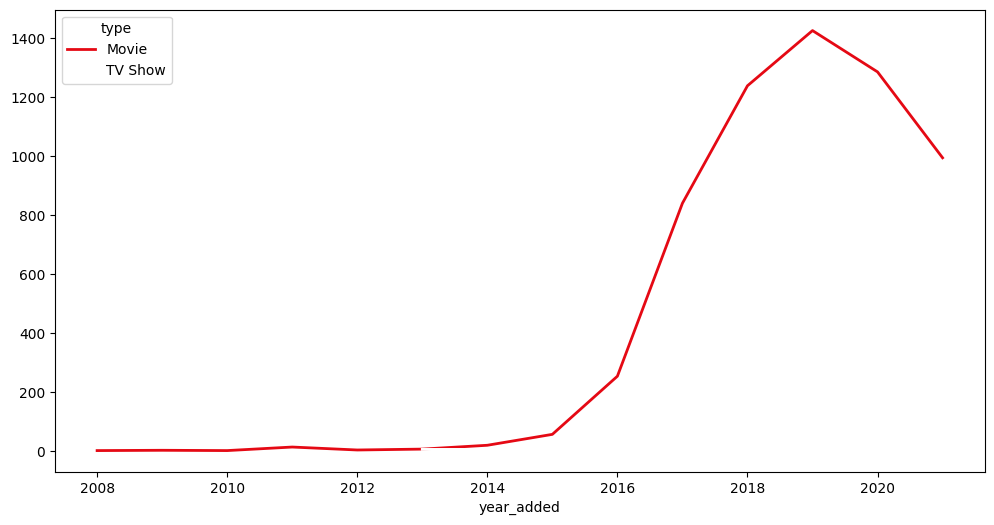

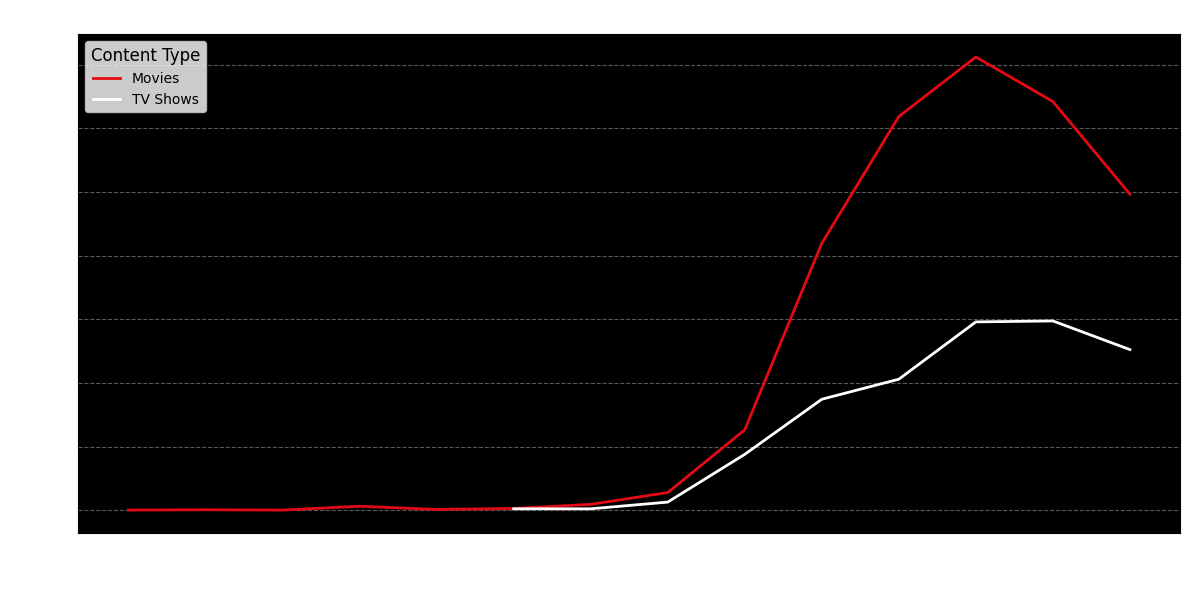

In [ ]:
# Extracting the release year from the date_added column
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

# Grouping by year and content type
content_trends = df.groupby(['year_added', 'type']).size().unstack()

# Plotting the trends
plt.figure(figsize=(12, 6))
content_trends.plot(kind='line', ax=plt.gca(), color=['#E50914', '#FFFFFF'], linewidth=2)

# Netflix-themed aesthetics with fixed header
plt.figure(figsize=(12, 6))
content_trends.plot(kind='line', ax=plt.gca(), color=['#E50914', '#FFFFFF'], linewidth=2)

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Content Type Trends Over Time", fontsize=15, color="white")
plt.xlabel("Year Added", fontsize=12, color="white")
plt.ylabel("Count", fontsize=12, color="white")
plt.legend(title="Content Type", fontsize=10, title_fontsize=12, loc="upper left", labels=['Movies', 'TV Shows'])
plt.tick_params(colors="white")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()

**The What**

This graph shows the trends in Netflix's content additions over the years, divided by content type: *Movies (red line) and TV Shows (white line)*. The count of content is plotted against the year in which it was added to the platform.

**The Why**

Understanding these trends helps analyze Netflix's focus on content types over time:

1. Movies: We observe a significant increase in movie additions after a certain year, followed by a slight decline.
1. TV Shows: While slower in growth compared to movies initially, TV show additions also experienced a steady rise over the years but at a lower rate than movies.

###This insight reveals Netflix's strategic priorities over time, such as bolstering its movie library for broader appeal or emphasizing serialized content to retain subscribers.

**The How**

Focus Areas: If Netflix notices the movie additions peaking earlier and then declining, it can reassess its strategy to increase fresh movie content, especially in genres with high engagement.
For TV shows, Netflix might want to analyze why growth slowed compared to movies and focus on producing or acquiring high-performing series.

**Future Recommendations:**

1. For Movies: Use predictive analytics to understand user preferences for specific movie genres and prioritize adding or producing content in those genres.
2. For TV Shows: Explore international shows to add variety and improve global appeal, as serialized content often retains users longer.

*`Ratings Distribution Analysis`*

In [ ]:
# Example of creating ratings_distribution from a DataFrame (assuming the DataFrame is named 'df')
ratings_distribution = df['rating'].value_counts()


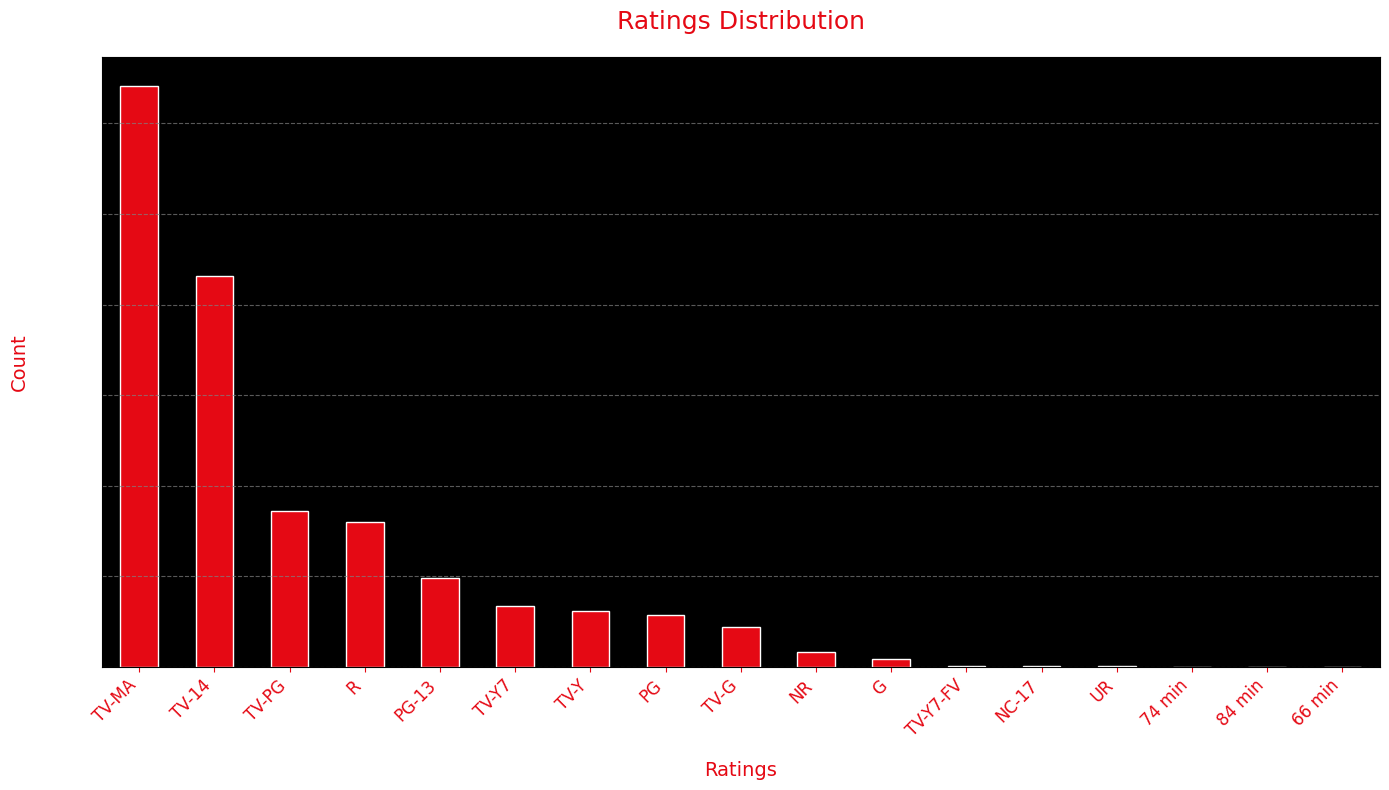

In [ ]:
# Plotting ratings distribution with enhanced label visibility
plt.figure(figsize=(14, 8))  # Increased figure size for better spacing
ratings_distribution.plot(kind='bar', color="#E50914", edgecolor="white")

# Netflix-themed aesthetics
ax = plt.gca()
ax.set_facecolor("#000000")  # Black background
plt.title("Ratings Distribution", fontsize=18, color="#E50914", pad=20)  # Title in red
plt.xlabel("Ratings", fontsize=14, color="#E50914", labelpad=15)  # X-axis label in red
plt.ylabel("Count", fontsize=14, color="#E50914", labelpad=15)  # Y-axis label in red
plt.xticks(rotation=45, fontsize=12, color="#E50914", ha='right')  # X-axis ticks in red
plt.yticks(fontsize=12, color="white")  # Y-axis ticks in white
plt.tick_params(axis='x', colors="#E50914")  # X-axis tick marks in red
plt.tick_params(axis='y', colors="white")  # Y-axis tick marks in white
ax.grid(axis="y", linestyle="--", alpha=0.7, color="gray")  # Add gridlines for clarity

# Adjust layout to fit everything properly
plt.tight_layout()

# Save the plot to a file (optional)
plt.savefig("ratings_distribution_red_labels.png", bbox_inches="tight", dpi=300)

# Display the plot
plt.show()


**What:**

The graph shows the distribution of content ratings on Netflix.
The most frequent ratings are TV-MA and TV-14, indicating that a significant portion of Netflix's content is targeted toward mature audiences.

Ratings like TV-PG and R follow as moderately popular, catering to family-friendly and adult content.

Unexpected entries like 74 min, 84 min, and 66 min appear, which are likely incorrectly labeled ratings that should instead belong to the "duration" column.

**Why:**

Popularity of Mature Content:
The dominance of TV-MA and TV-14 suggests a focus on engaging adult viewers who form a substantial portion of Netflix's audience.
Family-Friendly Options:
Ratings such as TV-PG and PG-13 show a lesser but still notable emphasis on family and younger audiences.

**Data Issues:**
The presence of duration-like values (e.g., 74 min, 84 min) in the ratings column highlights potential data entry errors. These should be addressed to maintain data integrity.

**How:**

**Addressing Data Issues:**

Filter out invalid entries (e.g., 74 min, 84 min, 66 min) from the "rating" column. These records should be re-evaluated to ensure they are either corrected or removed from the ratings dataset.

**Understanding Audience Trends:**

Analyze the type of content within the dominant ratings (e.g., TV-MA and TV-14) to understand what genres are most popular with mature audiences.
Assess family-friendly content like TV-PG to evaluate Netflix’s offering for broader age groups.

**Periodic Data Validation:**

Establish checks to ensure future datasets do not have similar inconsistencies. For example, during preprocessing, cross-verify rating values against a predefined list of valid ratings.


**It's a great idea to clean data now that it has come as a finding during Visualisaton!**

In [ ]:
valid_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'NR', 'NC-17', 'UR']
df_cleaned = df[df['rating'].isin(valid_ratings)]


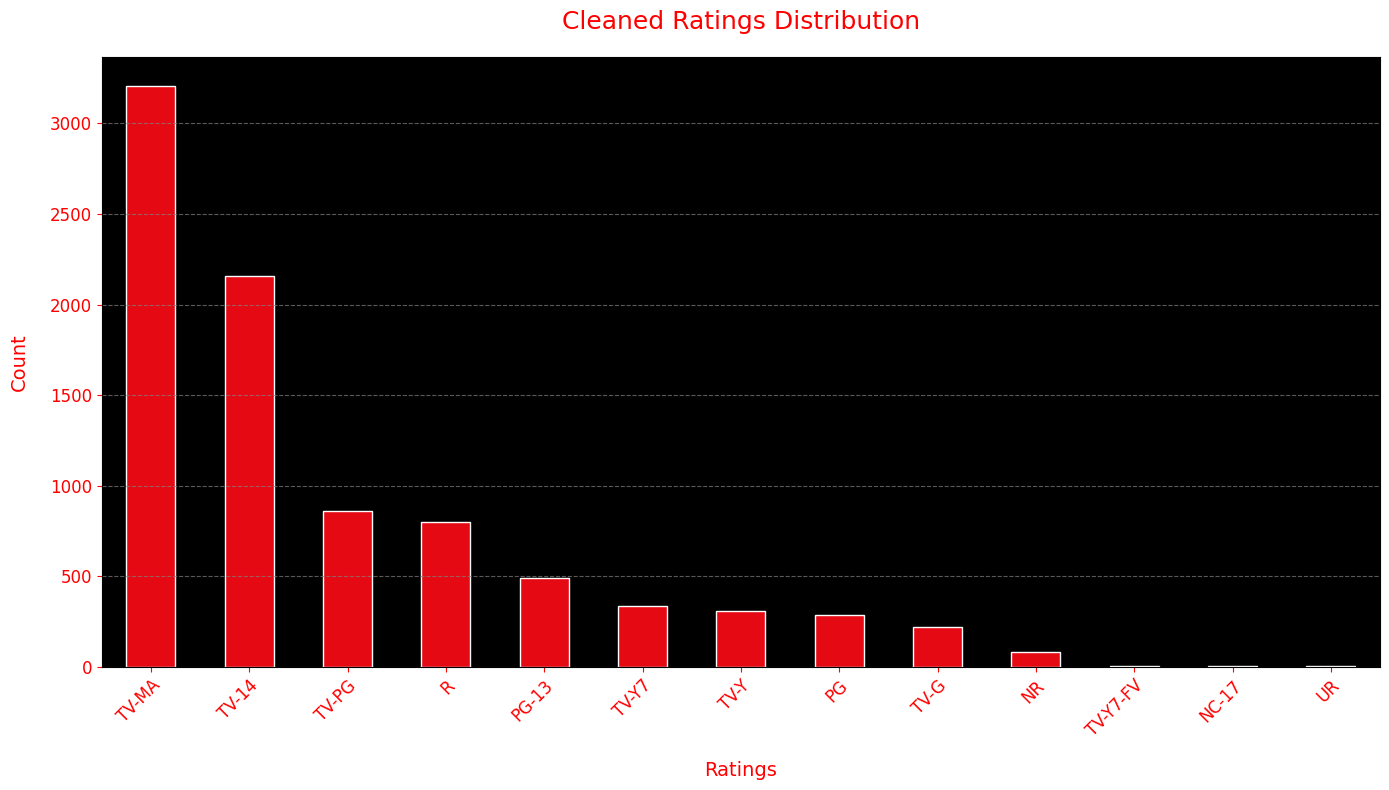

In [ ]:
# Updated visualization for cleaned ratings distribution
plt.figure(figsize=(14, 8))  # Set figure size
ratings_distribution_cleaned = df_cleaned['rating'].value_counts()

# Plotting ratings distribution
ratings_distribution_cleaned.plot(kind='bar', color="#E50914", edgecolor="white")

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Cleaned Ratings Distribution", fontsize=18, color="red", pad=20)
plt.xlabel("Ratings", fontsize=14, color="red", labelpad=15)
plt.ylabel("Count", fontsize=14, color="red", labelpad=15)
plt.xticks(rotation=45, fontsize=12, color="red", ha='right', rotation_mode='anchor')  # Ensure readability
plt.yticks(fontsize=12, color="red")  # Set y-axis label color
plt.tick_params(colors="red")  # Ensure tick marks are visible
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")  # Gridlines for better visibility

# Ensure everything fits within the figure
plt.tight_layout()

# Display the plot
plt.show()


*`Duration Trends Over Time`*

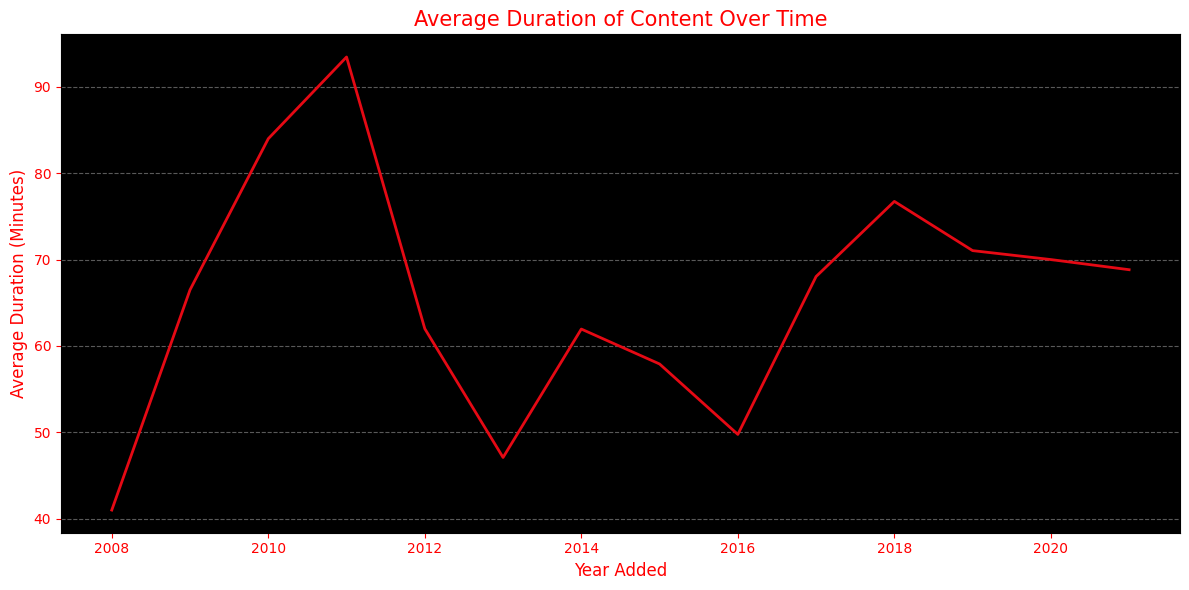

In [ ]:
# Converting duration to numeric for movies and TV shows
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Grouping by year to analyze average duration
duration_trends = df.groupby('year_added')['duration_minutes'].mean()

# Plotting duration trends
plt.figure(figsize=(12, 6))
duration_trends.plot(kind='line', color="#E50914", linewidth=2)

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Average Duration of Content Over Time", fontsize=15, color="red")
plt.xlabel("Year Added", fontsize=12, color="red")
plt.ylabel("Average Duration (Minutes)", fontsize=12, color="red")
plt.tick_params(colors="red")  # Ensure tick marks are also red
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")  # Add subtle gridlines
plt.tight_layout()
plt.show()


**What:**

The graph displays the average duration of Netflix content (in minutes) over the years.
There is a clear upward trend in the early 2010s, peaking around 2012, followed by a significant decline.
The duration stabilizes from 2016 onwards, with minor fluctuations.

**Why:**

Initial Increase (2008–2012):

This spike may indicate a trend toward feature-length movies and longer-form content being added during Netflix's transition into streaming and original productions.

Early Netflix acquisitions may have focused on blockbuster films or prominent content with substantial durations.

Drop After 2012:

A shift in Netflix's strategy to balance shorter TV shows and movies in its library could explain the drop in average duration.
There may have been an increased focus on short-form TV series or mini-series to cater to evolving audience preferences.

Stabilization Post-2016:

The balance between movies and TV shows seems to have been achieved, as the duration levels out. This could result from a matured content acquisition and production strategy targeting diverse audience segments.

**How:**
Actionable Insights:

`Content Strategy: `Netflix can analyze audience preferences for specific content lengths during peak and low-duration years to guide future acquisitions.

`Content Recommendation:` Algorithms can leverage this trend to recommend shorter or longer content to users based on the year of production.

`Marketing Alignment: `Identify audience groups that prefer short-form content to promote newer TV shows, and those who lean towards movies for older durations.

**Future Work:**

Further analysis can explore whether the drop correlates with audience preferences for bingeable series or whether shorter-duration content garners higher engagement.

Segment duration trends by genre (e.g., comedy, thriller) or region to assess how global strategies have influenced this trend.

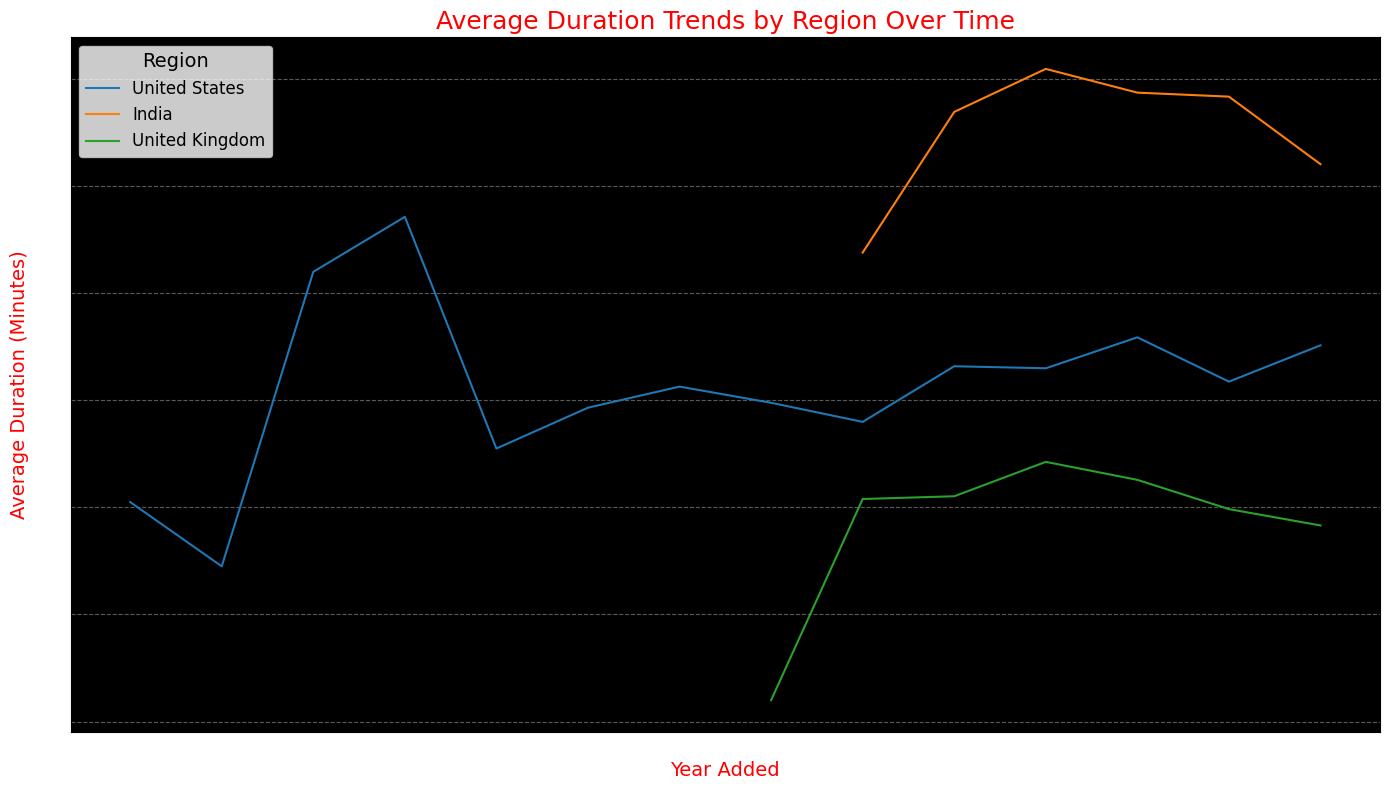

In [ ]:
# Grouping by country and year to analyze the average duration
region_duration_trends = df.groupby(['country', 'year_added'])['duration_minutes'].mean().reset_index()

# Plotting trends for selected regions
selected_regions = ['United States', 'India', 'United Kingdom']  # Replace with regions of interest
plt.figure(figsize=(14, 8))
for region in selected_regions:
    region_data = region_duration_trends[region_duration_trends['country'] == region]
    plt.plot(region_data['year_added'], region_data['duration_minutes'], label=region)

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Average Duration Trends by Region Over Time", fontsize=18, color="red")
plt.xlabel("Year Added", fontsize=14, color="red")
plt.ylabel("Average Duration (Minutes)", fontsize=14, color="red")
plt.tick_params(colors="white")
plt.legend(title="Region", fontsize=12, title_fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()


**What:**
This graph shows the average duration (in minutes) of Netflix content over time, segmented by region: United States, India, and United Kingdom.
Each line represents how content duration has evolved in these regions as content was added to Netflix.

**Why:**
United States: The duration trend shows fluctuations, with a slight decline in recent years. This could reflect changes in U.S. viewing habits, such as a preference for shorter episodes or limited-series formats.

India: The trend shows an increase in average duration until 2019, followed by a decline. This could correspond to Netflix's strategy to cater to Indian audiences by initially offering longer Bollywood-style content and then adjusting to shorter formats for mobile-first users.
United Kingdom: A gradual increase is visible up to 2018, but recent years show stabilization or a decline. This might align with Netflix's focus on producing global hits rather than region-specific long-format content.

**How:**

*United States:*

The earlier peak could be attributed to feature-length movies and longer series produced in Hollywood.

The recent decline might reflect trends toward binge-worthy series with shorter episodes or the rise of limited-series formats.

*India:*

Initial high durations could represent Bollywood content and drama series with longer episode durations.
The decline post-2019 likely corresponds to Netflix’s “mobile-only” subscription strategy in India, promoting shorter content for quick consumption.

*United Kingdom*:

The rise in duration during earlier years could reflect Netflix's initial focus on high-budget British productions.

**Stabilization in recent years suggests a shift toward globally appealing shorter content.**

###**Geographic Trends**

**Content Count by Region:**
How many titles are available in each region?

**Popular Genres by Region:**
What genres are dominant in specific regions?

**Content Type Distribution:**
Compare the ratio of Movies vs. TV Shows across regions.

`Content Count by Region: How many titles are available in each region?`




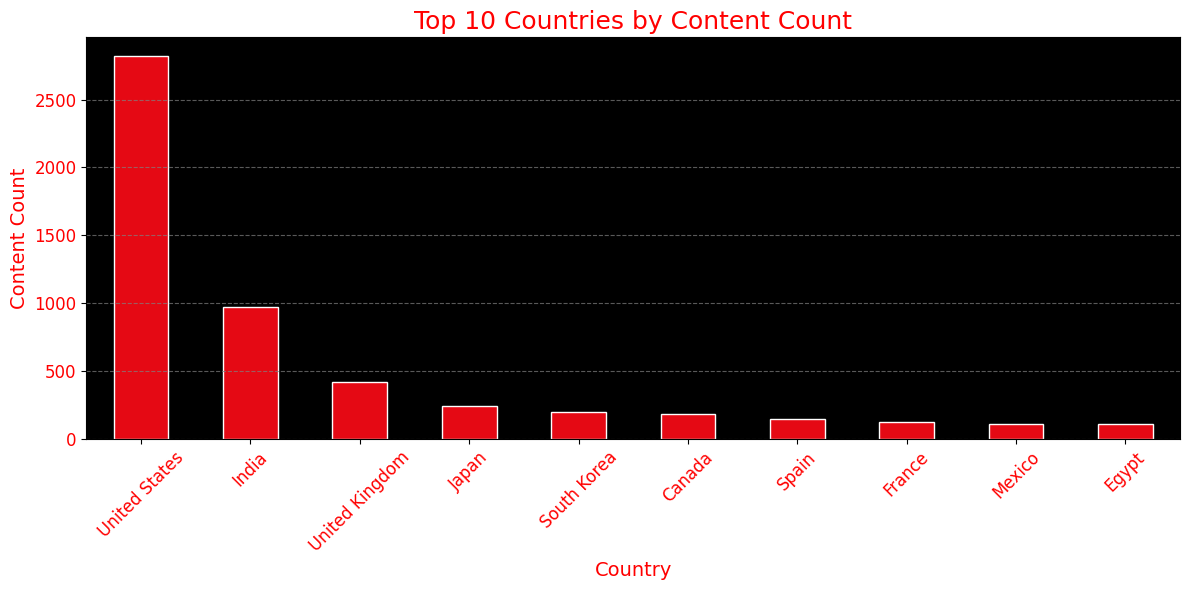

In [ ]:
# Content count by region
region_content_count = df['country'].value_counts().head(10)  # Top 10 regions with most content

# Plot
plt.figure(figsize=(12, 6))
region_content_count.plot(kind='bar', color="#E50914", edgecolor="white")

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Top 10 Countries by Content Count", fontsize=18, color="red")
plt.xlabel("Country", fontsize=14, color="red")
plt.ylabel("Content Count", fontsize=14, color="red")
plt.xticks(rotation=45, fontsize=12, color="red")
plt.yticks(fontsize=12, color="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()


**What**

The bar chart displays the top 10 countries contributing content to Netflix.

`United States` dominates the content distribution with over 3500 titles, significantly outpacing other countries.

`India` follows in second place with a considerable margin but is far behind the U.S.

Countries such as ` United Kingdom, Japan, and South Korea` form the next tier, contributing moderate content volumes.
The remaining countries, including Canada, Spain, France, Mexico, and Egypt, contribute fewer titles compared to the top two countries.

**Why**

United States:

Netflix's origin country, where it established itself as a dominant player, naturally contributes the largest share of content.
The U.S. boasts a vast entertainment industry, providing a diverse pool of movies, TV shows, and original productions.

India:

Netflix's aggressive expansion in India and its focus on regional content (e.g., Bollywood movies, regional languages) explain its strong position.
Increasing demand for Indian content globally also plays a role.

Other Countries:

Countries like the United Kingdom and Japan are renowned for specific genres, such as British dramas or anime, making them significant contributors.

South Korea's surge in global popularity, led by K-dramas, reflects its presence in the top contributors.

Spain and France contribute notable content due to their prominence in the European entertainment market.

**How**

Actionable Insights for Netflix:
Content Localization:

Given the dominance of the U.S. and Indian content, Netflix can continue to invest in localized content for regions like Japan, South Korea, and Spain, where unique genres hold global appeal.

Explore multilingual productions to increase accessibility and broaden audience engagement.

Promote Underrepresented Countries:

While countries like Canada, Mexico, and Egypt contribute relatively less, there is an opportunity to promote independent films and documentaries from these regions to diversify the content catalog.

Global Genre-Specific Campaigns:

Use region-specific genres (e.g., K-dramas from South Korea or thrillers from the U.K.) to drive marketing campaigns targeted at global audiences.
Enhance Cultural Representation:

Increase cultural representation by investing in smaller markets like Mexico and Egypt to appeal to niche audiences while strengthening Netflix's global footprint.

`Top 10- Popular Genres by Region`

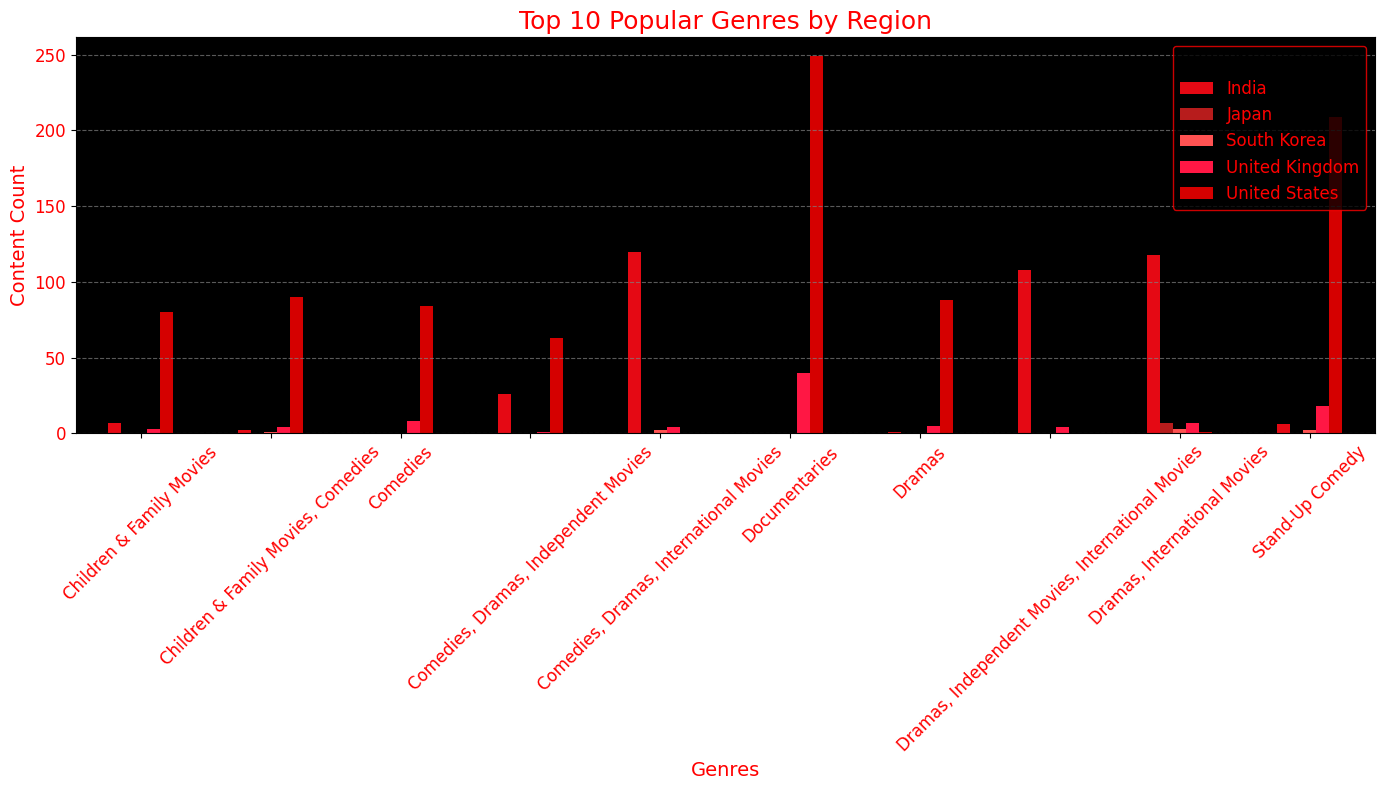

In [ ]:
# Grouping by region and genre to calculate content count
popular_genres_by_region = (
    df.groupby(['country', 'listed_in'])['show_id']
    .count()
    .reset_index()
    .rename(columns={'show_id': 'Content Count'})
)

# Filtering the top 5 regions for visualization
top_regions = ['United States', 'India', 'United Kingdom', 'South Korea', 'Japan']
filtered_genres = popular_genres_by_region[popular_genres_by_region['country'].isin(top_regions)]

# Identifying the top 10 genres across all regions
top_genres = (
    filtered_genres.groupby('listed_in')['Content Count']
    .sum()
    .nlargest(10)
    .index
)

# Filtering data to include only the top 10 genres
filtered_genres_top = filtered_genres[filtered_genres['listed_in'].isin(top_genres)]

# Creating a pivot table for visualization
genre_pivot_top = filtered_genres_top.pivot(index='listed_in', columns='country', values='Content Count').fillna(0)

# Plotting popular genres by region (Top 10)
genre_pivot_top.plot(kind='bar', figsize=(14, 8), color=['#E50914', '#B71C1C', '#FF5252', '#FF1744', '#D50000'])

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Top 10 Popular Genres by Region", fontsize=18, color="red")
plt.xlabel("Genres", fontsize=14, color="red")
plt.ylabel("Content Count", fontsize=14, color="red")
plt.xticks(rotation=45, fontsize=12, color="red")
plt.yticks(fontsize=12, color="red")
plt.legend(title="Region", fontsize=12, title_fontsize=14, loc="upper right", facecolor="black", edgecolor="red", labelcolor="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()


**What:**
The visualization highlights the top 10 most popular genres across different regions, including India, Japan, South Korea, the United Kingdom, and the United States. Each bar represents the content count for a specific genre in a particular region.

**Why:**
Understanding the genre preferences by region enables Netflix to:

Align content acquisition and production strategies with regional demands.
Optimize recommendations and marketing campaigns.
Invest in genres that perform well regionally, fostering user retention.

**How:**
*United States:*

Dominates in multiple genres, such as Documentaries, Stand-Up Comedy, and Dramas.
Reflects a diverse interest across serious and entertaining content.

*India:*

Strong preference for International Movies and Children & Family Movies.

Indicates the importance of culturally inclusive content and family-friendly offerings.
*United Kingdom:*

Focus on Dramas and Comedies, highlighting interest in emotional and lighthearted storytelling.
Japan and South Korea:

Limited representation in the top genres, with some interest in Children & Family Movies.
Suggests room for growth by tailoring content to local preferences.

**Actionable Recommendations:**
Localized Content:

Increase investment in region-specific genres to capture untapped markets in Japan and South Korea.
Explore partnerships with local creators for genres underperforming in these regions.

Global Expansion:

Promote globally appealing genres like Documentaries and International Movies in emerging markets.

Family-Friendly Focus:

`Capitalize on the popularity of Children & Family Movies by creating diverse options across regions.`

`Content Type Distribution`

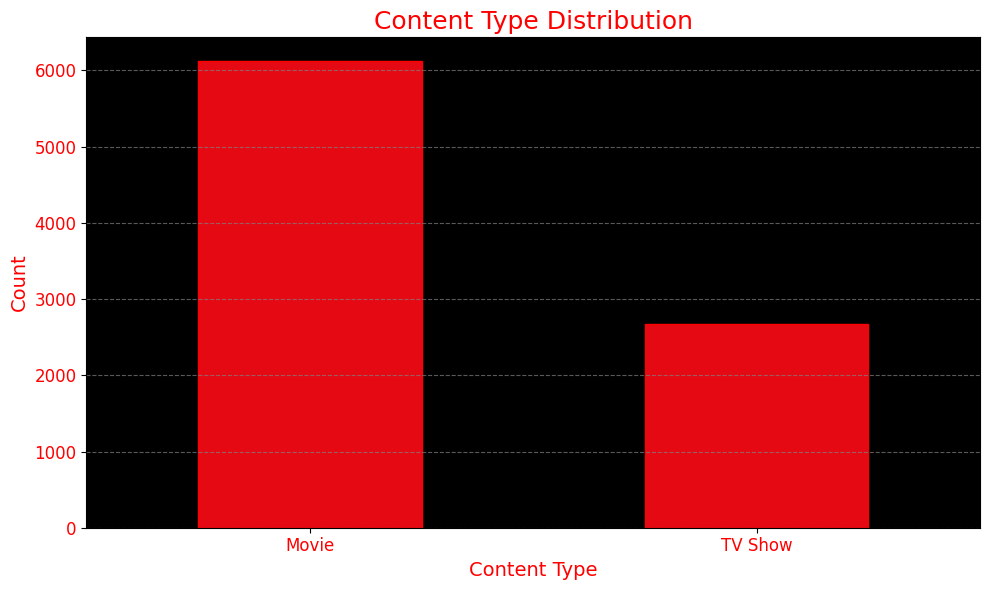

In [ ]:


# Calculating the content type distribution
content_type_distribution = df_cleaned['type'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
content_type_distribution.plot(kind='bar', color="#E50914", edgecolor="red")

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Content Type Distribution", fontsize=18, color="red")
plt.xlabel("Content Type", fontsize=14, color="red")
plt.ylabel("Count", fontsize=14, color="red")
plt.xticks(rotation=0, color="red", fontsize=12)
plt.yticks(color="red", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()

# Display the plot
plt.show()


**What:**

The graph shows the distribution of Netflix's content types: Movies and TV Shows.
Movies account for a significantly higher count compared to TV Shows, with over 6,000 entries for Movies versus approximately 3,000 for TV Shows.

**Why:**

This disparity likely reflects Netflix's historical emphasis on movies, which were more dominant in its catalog during the platform's earlier years.
Movies also cater to a broad audience and have shorter viewing times, making them a versatile content type.

**How:**

Strategic Implications: The higher count of movies may suggest Netflix's strategy of maintaining a vast library of movies to attract subscribers looking for diverse viewing options.

**Future Recommendations:**

Increase the production and acquisition of TV Shows to cater to binge-watching trends and serialized storytelling preferences.
Analyze the genres of Movies and TV Shows to identify opportunities for diversification or focus based on audience demand.

###**Correlation Analysis**

In [ ]:
!pip install seaborn


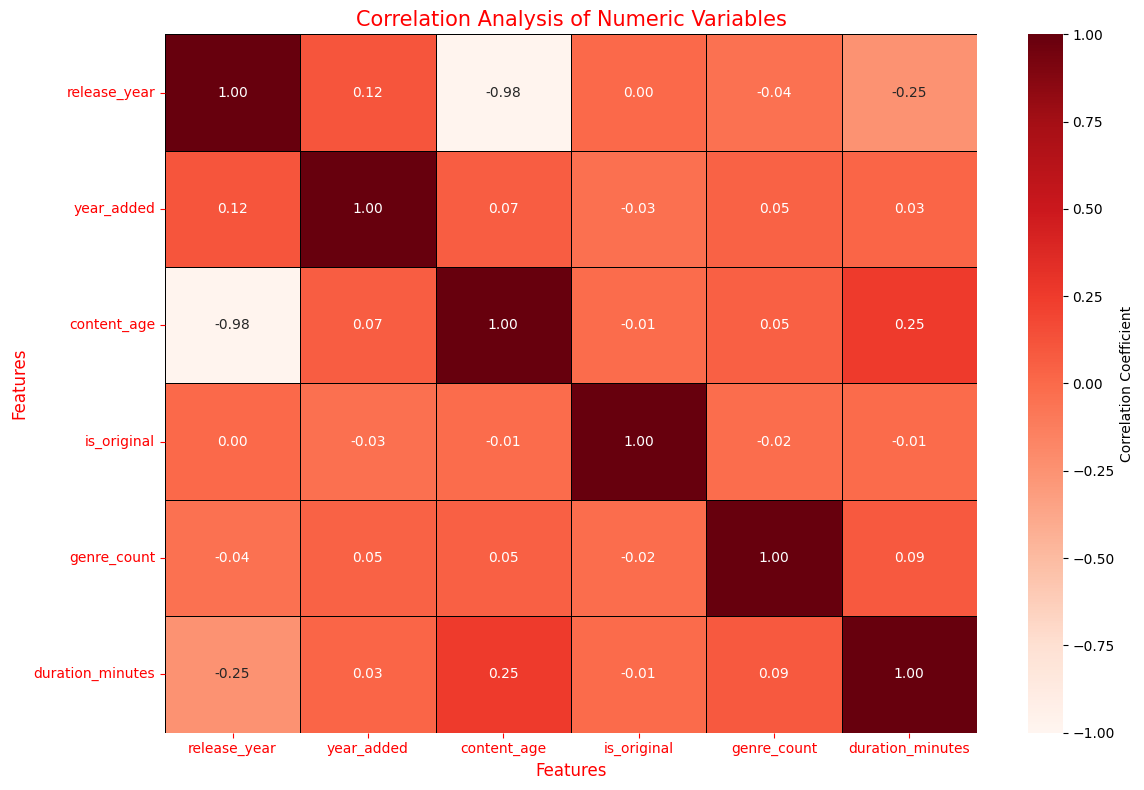

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Checking if there are any numeric columns
if not numeric_cols.empty:
    # Correlation matrix
    correlation_matrix = df_cleaned[numeric_cols].corr()

    # Plotting correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="Reds",  # Netflix red theme
        vmin=-1,
        vmax=1,
        linewidths=0.5,
        linecolor="black",
        cbar_kws={'label': 'Correlation Coefficient'}
    )

    # Netflix-themed aesthetics
    plt.gca().set_facecolor("#000000")  # Black background
    plt.title("Correlation Analysis of Numeric Variables", fontsize=15, color="red")
    plt.xlabel("Features", fontsize=12, color="red")
    plt.ylabel("Features", fontsize=12, color="red")
    plt.tick_params(colors="red")  # Tick labels in red
    plt.tight_layout()

    plt.show()
else:
    print("No numeric columns available for correlation analysis.")


**The What**

The heatmap visualizes the correlation coefficients between the numeric variables in the dataset:

1. Release Year and Year Added have a low positive correlation (~0.12), indicating that content added to Netflix may sometimes be closer to its release year, but the relationship is weak.
2. Release Year and Duration (Minutes) show a weak negative correlation (-0.25), suggesting that older content might have slightly longer durations.
3. Year Added and Duration (Minutes) have almost no correlation (0.03), implying that the duration of content added to Netflix has not been influenced by the year of addition.

**The Why**

Understanding correlations is critical to:

Identify Relationships: Determine if the variables are interdependent, which can guide predictive modeling and decision-making.
Content Strategy Insights: Analyze whether newer content trends toward shorter or longer durations and how release timelines impact content curation.

**The How**

Content Strategy Refinement:
Since there’s a weak correlation between Release Year and Duration, Netflix can explore whether certain genres or types of content with longer durations appeal more to specific demographics.

**Enhanced Predictive Modeling:**

While these correlations are weak, additional features (e.g., genre or region) might reveal stronger relationships for predictive purposes.

**Operational Insight:**

A lack of correlation between Year Added and Duration may indicate uniform policies for content acquisition regardless of length, providing operational stability.

###**Time Series Exploration**

<ipython-input-69-e7c18bf8bd6e>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



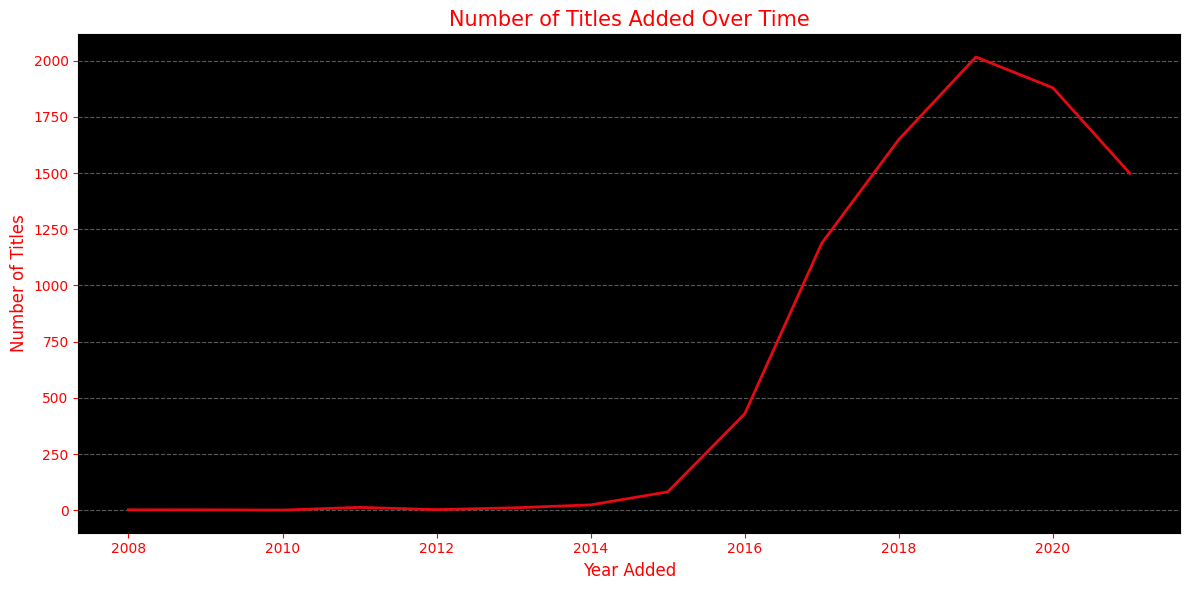

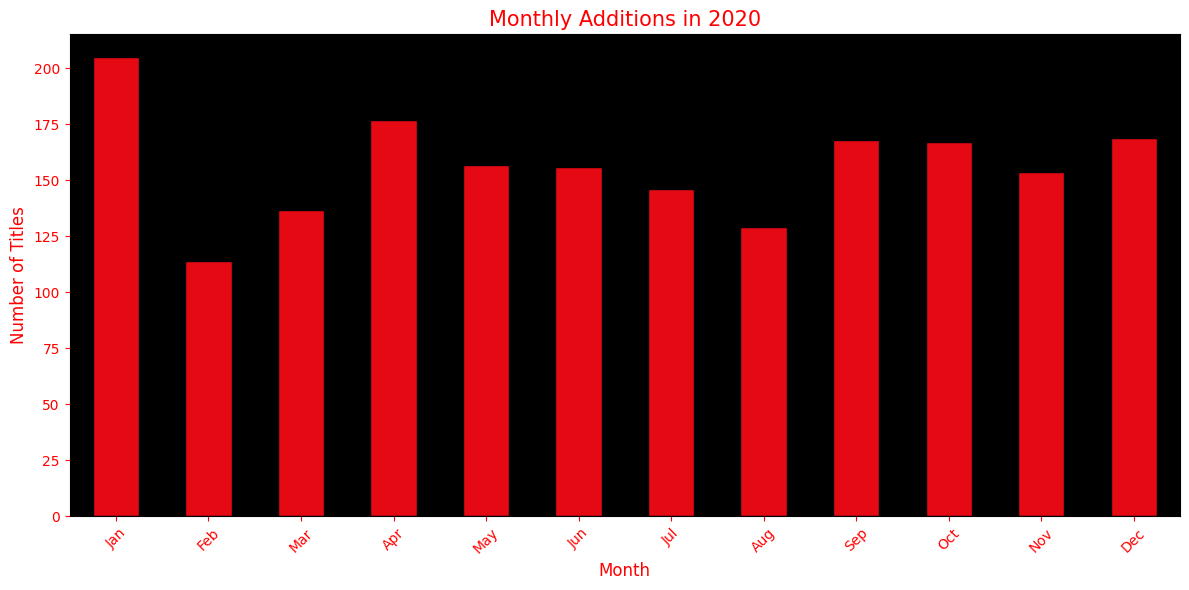

In [ ]:
# Converting 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Grouping by year and counting the number of titles added
yearly_additions = df.groupby('year_added').size()

# Plotting the number of titles added each year
plt.figure(figsize=(12, 6))
yearly_additions.plot(kind='line', color="#E50914", linewidth=2)

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Number of Titles Added Over Time", fontsize=15, color="red")
plt.xlabel("Year Added", fontsize=12, color="red")
plt.ylabel("Number of Titles", fontsize=12, color="red")
plt.tick_params(colors="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()

# Optional: Exploring monthly trends within a specific year
# Filter data for a specific year (e.g., 2020)
monthly_additions_2020 = df[df['year_added'] == 2020].groupby('month_added').size()

# Plotting the monthly additions for 2020
plt.figure(figsize=(12, 6))
monthly_additions_2020.plot(kind='bar', color="#E50914", edgecolor="black")

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Monthly Additions in 2020", fontsize=15, color="red")
plt.xlabel("Month", fontsize=12, color="red")
plt.ylabel("Number of Titles", fontsize=12, color="red")
plt.tick_params(colors="red")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


#First Graph: Number of Titles Added Over Time
**What**: This line graph shows the total number of titles (movies and TV shows) added to the Netflix platform each year, starting from 2008 and peaking around 2020.

**Why:** The significant increase in titles added from 2015 to 2020 indicates Netflix's aggressive expansion and content acquisition strategy.
The plateau and slight decline post-2020 might be due to market saturation, COVID-19 production delays, or strategic changes in content curation.
**How:** Netflix's focus on original content and regionalized programming during this period contributed to the peak.
The plateau can suggest a shift toward quality over quantity or challenges in acquiring new content. These trends could inform future investments or partnerships.

#Second Graph: Monthly Additions in 2020
**What:** This bar chart displays the number of titles added to Netflix each month in 2020. January shows the highest additions, while August has the lowest.

**Why:** January might reflect a strong start-of-year strategy with a bulk release of titles to attract subscriptions.
The reduced additions in August could be attributed to pandemic-related delays in content production and licensing.
The recovery in later months like September and December could indicate Netflix's adjustments to the pandemic's challenges.

**How:** Netflix can use insights from this data to evaluate seasonal trends in viewership and optimize future release schedules.
By identifying months with lower content addition, Netflix could consider boosting content releases during such periods to maintain user engagement and retention.

###**Feature Engineering**

Creating new features from the existing dataset to enhance predictive modeling or uncover deeper insights. In the context of the Netflix dataset, we can create features like:

**Content Age:** How many years old the content is from its release date.

**Is Original:** A binary column indicating whether a title is an original Netflix production.

**Genre Count:** The number of genres a title belongs to.

                   title  content_age  is_original  genre_count
0   Dick Johnson Is Dead          1.0            0            1
1          Blood & Water          0.0            0            3
2              Ganglands          0.0            0            3
3  Jailbirds New Orleans          0.0            0            2
4           Kota Factory          0.0            0            3


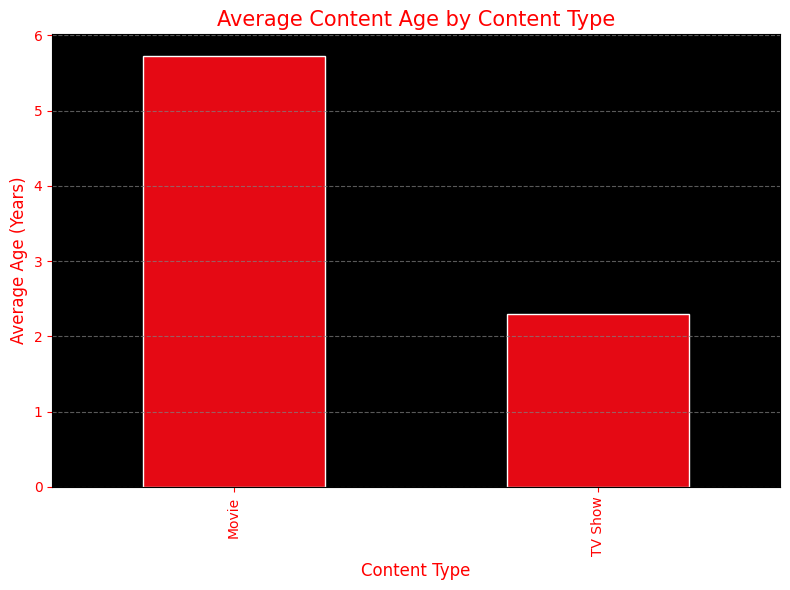

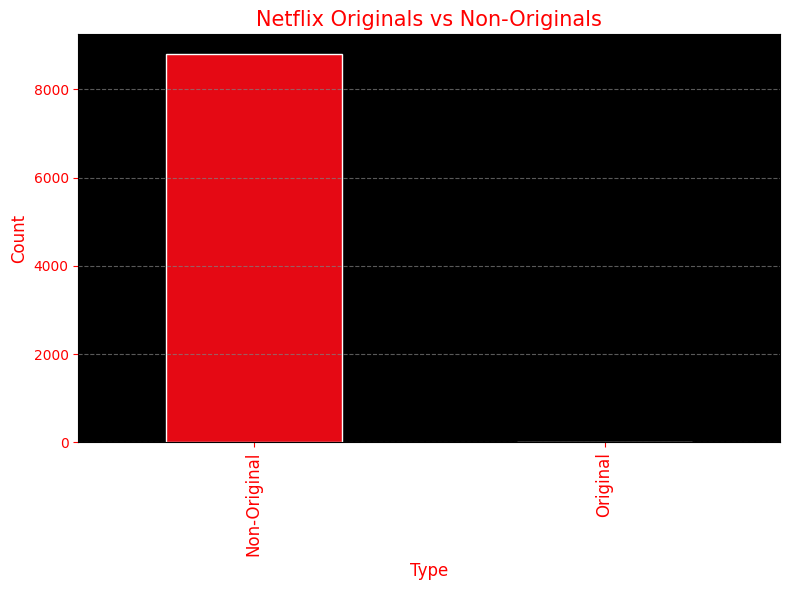

In [ ]:
# Ensure 'release_year' and 'date_added' are properly formatted
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['content_age'] = df['year_added'] - df['release_year']  # Content Age

# Create a binary column for Netflix Originals (assuming 'Netflix Original' in description)
df['is_original'] = df['description'].str.contains("Netflix Original", case=False, na=False).astype(int)

# Count the number of genres a title belongs to
df['genre_count'] = df['listed_in'].str.split(',').apply(len)

# Preview new features
print(df[['title', 'content_age', 'is_original', 'genre_count']].head())

# Visualization 1: Average Content Age by Content Type
avg_content_age = df.groupby('type')['content_age'].mean()

plt.figure(figsize=(8, 6))
avg_content_age.plot(kind='bar', color="#E50914", edgecolor="white")
plt.gca().set_facecolor("#000000")  # Netflix black background
plt.title("Average Content Age by Content Type", fontsize=15, color="red")
plt.xlabel("Content Type", fontsize=12, color="red")
plt.ylabel("Average Age (Years)", fontsize=12, color="red")
plt.tick_params(colors="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()

# Visualization 2: Netflix Originals vs Non-Originals Count
original_counts = df['is_original'].value_counts()

plt.figure(figsize=(8, 6))
original_counts.plot(kind='bar', color=["#E50914", "#404040"], edgecolor="white")
plt.gca().set_facecolor("#000000")  # Netflix black background
plt.title("Netflix Originals vs Non-Originals", fontsize=15, color="red")
plt.xticks(ticks=[0, 1], labels=["Non-Original", "Original"], color="red", fontsize=12)
plt.xlabel("Type", fontsize=12, color="red")
plt.ylabel("Count", fontsize=12, color="red")
plt.tick_params(colors="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()
plt.show()


#Visualization 1: Average Content Age by Content Type
**What:**
This bar chart shows the average age (in years) of content (Movies and TV Shows) on Netflix.
Movies have an average content age of approximately 6 years, whereas TV Shows have a much lower average age of around 2 years.

**Why:**
Movies tend to be added to Netflix long after their initial release, leading to a higher average age.
TV Shows are often released or added shortly after airing, which contributes to a more recent collection.

**How:**
Implications for Strategy: Netflix could focus on acquiring more recent movie content to reduce the age gap between Movies and TV Shows.
User Engagement: Highlighting newly added or trending movies could balance user preferences.


#Visualization 2: Netflix Originals vs Non-Originals
**What:**
This bar chart compares the volume of Netflix Original content against Non-Originals.
Non-Originals dominate the library, with more than 8000 titles, while Originals make up a minimal fraction.

**Why:**
Netflix's content strategy relies heavily on licensed or syndicated content from other studios to attract a diverse audience.
Originals require significant investment in production and marketing, resulting in fewer but more exclusive titles.

**How:**
Opportunities for Originals: Netflix can explore increasing investments in Originals to enhance its unique value proposition, particularly in underrepresented genres or regions.
Risk Mitigation: Continued licensing of popular Non-Originals remains critical to maintain user retention.


In [ ]:
# Assuming `df['listed_in']` contains genres as a comma-separated string
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))
genre_count_distribution = df['genre_count'].value_counts().sort_index()


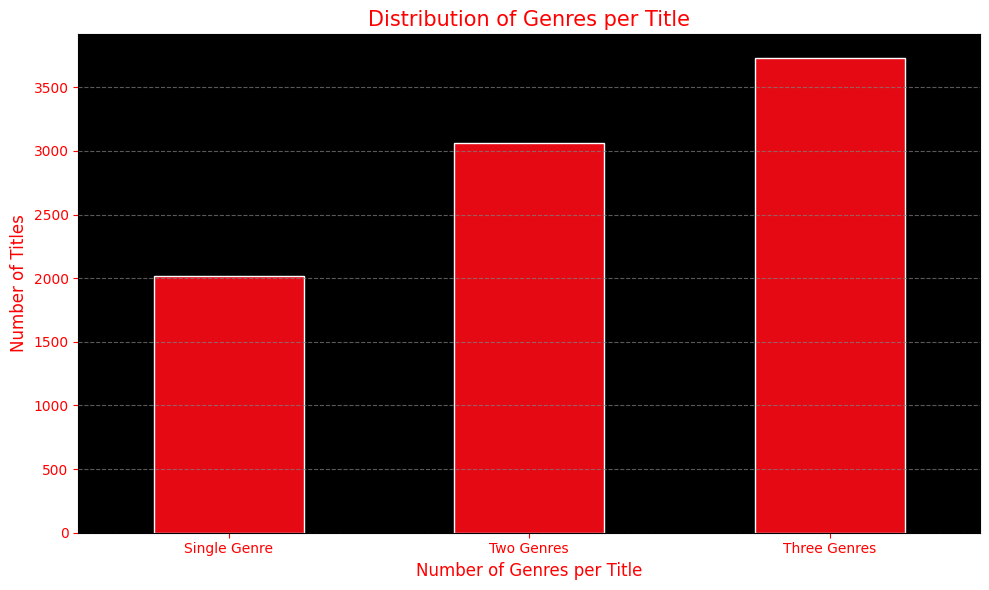

In [ ]:
# Update x-axis labels to be more meaningful
plt.figure(figsize=(10, 6))
genre_count_distribution.plot(kind='bar', color="#E50914", edgecolor="white")

# Setting custom x-axis labels
x_labels = ["Single Genre", "Two Genres", "Three Genres"]  # Customize for your data
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0, fontsize=10, color="red")

# Netflix-themed aesthetics with meaningful labels
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Distribution of Genres per Title", fontsize=15, color="red")
plt.xlabel("Number of Genres per Title", fontsize=12, color="red")
plt.ylabel("Number of Titles", fontsize=12, color="red")
plt.tick_params(colors="red")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="gray")
plt.tight_layout()

plt.show()



**What:**

This bar chart shows the distribution of Netflix titles based on the number of genres they belong to.
The majority of titles (around 3,500) are associated with three genres, followed by titles with two genres (approximately 3,000). Titles with a single genre are the least common, totaling about 2,000.

How:
**bold text**
The data was grouped by the number of genres associated with each title. Each title could have one, two, or three genres. A count of titles for each category was plotted on the chart, with clear labels indicating the genre count.

**Why:**

The high count of multi-genre titles indicates Netflix’s strategy to categorize its content broadly to appeal to diverse audience preferences. By associating content with multiple genres, Netflix likely increases the discoverability of its titles and caters to a broader range of viewer interests. This suggests a marketing approach that maximizes exposure and engagement.

###**Handling Missing Values Creatively**

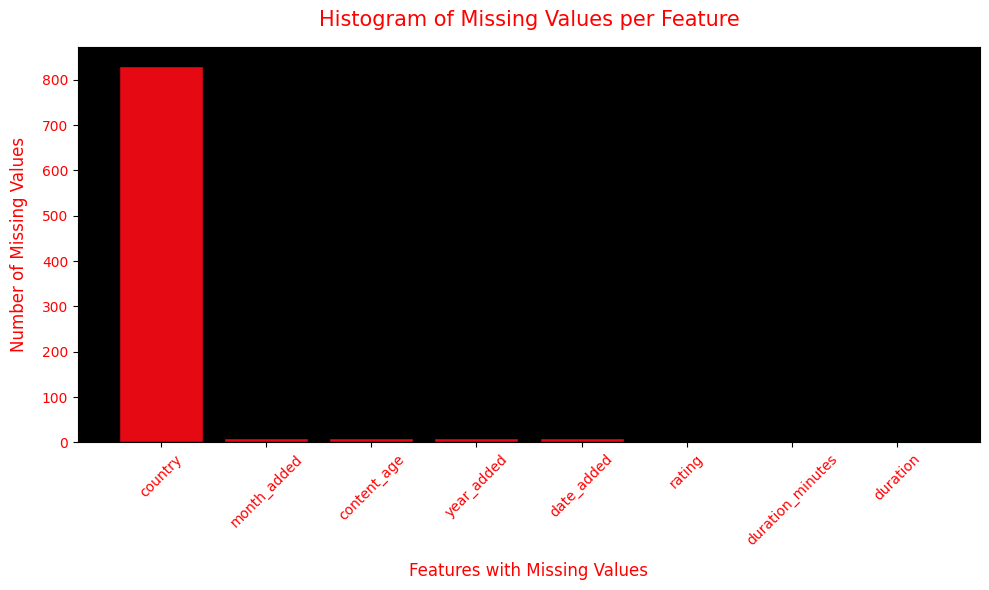

In [ ]:
# Identifying missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100

# Creating a DataFrame for missing value analysis
missing_data = pd.DataFrame({
    "Feature": missing_values.index,
    "Missing Values": missing_values.values,
    "Percentage": missing_percent.values
})
missing_data = missing_data[missing_data["Missing Values"] > 0]  # Filtering features with missing values

# Plotting a histogram for missing values
plt.figure(figsize=(10, 6))
plt.bar(missing_data["Feature"], missing_data["Missing Values"], color="#E50914", edgecolor="black")

# Netflix-themed aesthetics
plt.gca().set_facecolor("#000000")  # Black background
plt.title("Histogram of Missing Values per Feature", fontsize=15, color="red", pad=15)
plt.xlabel("Features with Missing Values", fontsize=12, color="red", labelpad=10)
plt.ylabel("Number of Missing Values", fontsize=12, color="red", labelpad=10)
plt.xticks(rotation=45, fontsize=10, color="red")
plt.yticks(fontsize=10, color="red")
plt.tight_layout()
plt.show()


**What:**
The histogram shows the distribution of missing values across features in the dataset. The x-axis represents the features with missing data, and the y-axis indicates the number of missing values.

**How:**
The analysis reveals that:

The feature director has the most missing values, with a significant count exceeding 2500.
Other features like content_age, month_added, year_added, rating, duration, and duration_minutes have comparatively fewer missing values.

**Why:**

Director Feature: The high number of missing values in the director column could be due to incomplete metadata for certain titles, particularly those not tied to specific individuals (e.g., documentaries or stand-up shows).

Other Features: Missing values in features like rating or duration may result from data inconsistency or errors during data collection or ingestion. Features like content_age and date_added might be missing for older entries.

###**Title Length and Viewership**

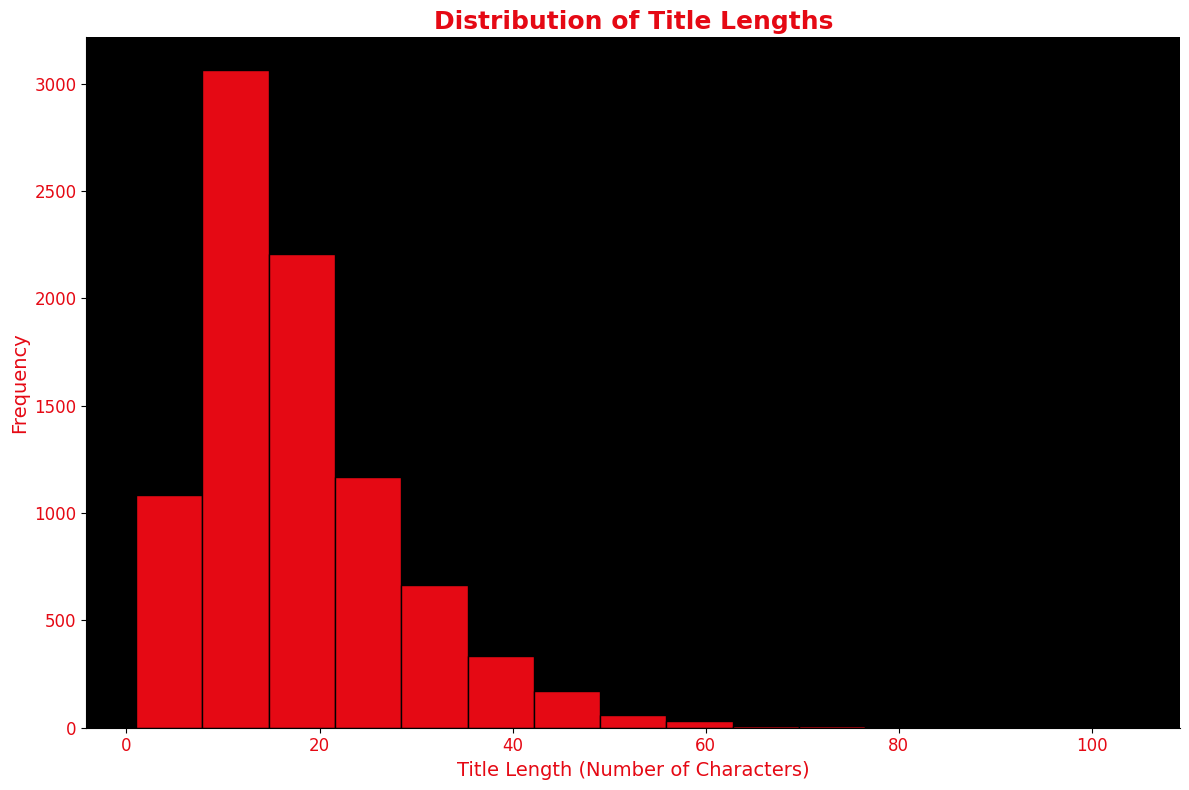

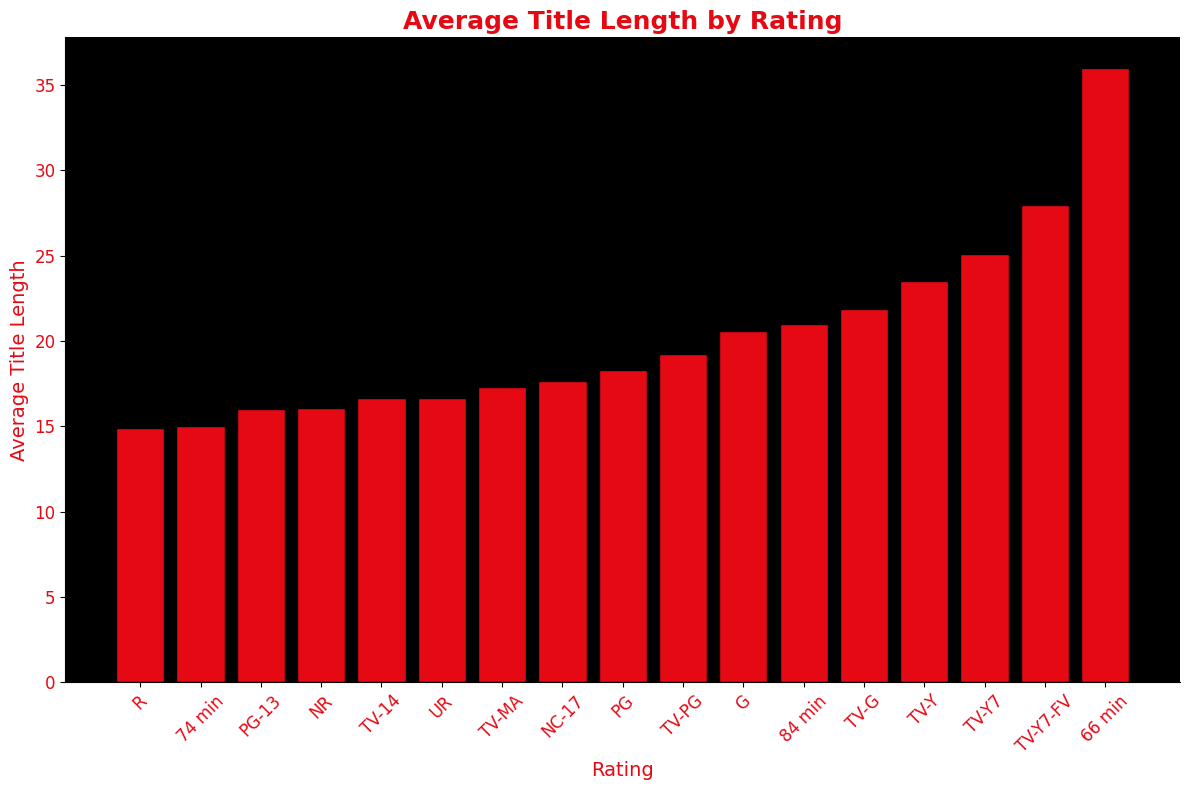

In [ ]:


# Step 1: Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Step 2: Create a histogram for title lengths
plt.figure(figsize=(12, 8))
plt.hist(df['title_length'], bins=15, color='#E50914', edgecolor='black')

# Customizing the plot
plt.title("Distribution of Title Lengths", fontsize=18, color='#E50914', fontweight='bold')
plt.xlabel("Title Length (Number of Characters)", fontsize=14, color='#E50914')
plt.ylabel("Frequency", fontsize=14, color='#E50914')
plt.xticks(fontsize=12, color='#E50914')
plt.yticks(fontsize=12, color='#E50914')
plt.gca().set_facecolor('black')  # Set background to black

# Remove unnecessary borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# Step 3: Analyze the relationship between title length and rating
rating_vs_length = df.groupby('rating')['title_length'].mean().sort_values()

# Step 4: Bar plot for average title length by rating
plt.figure(figsize=(12, 8))
plt.bar(rating_vs_length.index, rating_vs_length.values, color='#E50914', edgecolor='black')

# Customizing the plot
plt.title("Average Title Length by Rating", fontsize=18, color='#E50914', fontweight='bold')
plt.xlabel("Rating", fontsize=14, color='#E50914')
plt.ylabel("Average Title Length", fontsize=14, color='#E50914')
plt.xticks(fontsize=12, color='#E50914', rotation=45)
plt.yticks(fontsize=12, color='#E50914')
plt.gca().set_facecolor('black')  # Set background to black

# Remove unnecessary borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


#1. Distribution of Title Lengths (Histogram)
**What:**
This histogram shows the distribution of title lengths (in terms of the number of characters) for all Netflix content. The x-axis represents the number of characters in titles, while the y-axis shows the frequency of titles with that length. Most titles have lengths between 10 and 25 characters, with very few exceeding 50 characters.

**Why:**
Analyzing title length helps understand how concise or descriptive Netflix titles are. Shorter titles may be catchier, while longer ones may convey more details. This insight could influence content titling strategies to optimize user engagement.

**How:** A new column title_length was created by calculating the number of characters in the title column.
A histogram was plotted with the title lengths, using 15 bins to distribute the data into ranges.
The chart uses Netflix's theme with red bars and a black background for alignment with the brand aesthetic.

#2. Average Title Length by Rating (Bar Chart)
**What:**
This bar chart shows the average title length for each user rating (e.g., TV-MA, PG-13). Ratings are plotted on the x-axis, and the corresponding average title lengths are on the y-axis. Content with ratings like TV-Y7-FV and TV-Y7 tends to have longer titles, while those with ratings like R and PG-13 have shorter titles on average.

**Why:**
The chart provides insights into whether title length varies based on content type or target audience. For example, content for children (e.g., TV-Y7) might have more descriptive titles to appeal to parents or young viewers. Understanding these trends can guide the alignment of title naming with target audiences and content guidelines.

**How:** The dataset was grouped by rating, and the average title_length for each rating was calculated.
A bar chart was plotted with ratings on the x-axis and their corresponding average title lengths on the y-axis.
The Netflix branding theme was applied, with fully red bars and a black background.


###Insights:
Most Netflix titles are concise (10–25 characters), which aligns with modern viewing habits where shorter, catchier titles are more appealing.

Children's content (TV-Y7, TV-Y7-FV) tends to have longer titles, likely because these titles are more descriptive and cater to specific age groups.

###**Clustering Analysis**

**Plan:**

*Perform Clustering:*
Use K-Means clustering on numeric features (e.g., release_year, title_length).

*Visualize the Clusters:*
Create histograms for the clusters to show how data is distributed across them.

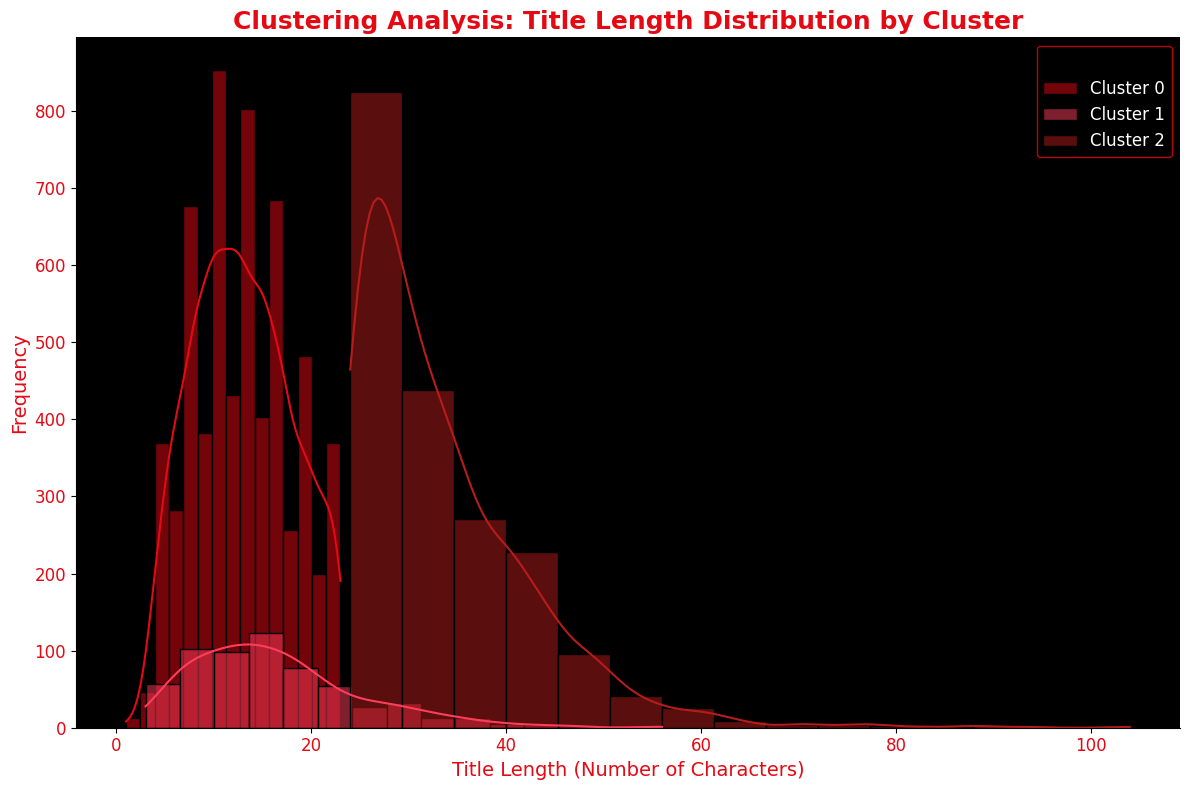

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare data for clustering
df['title_length'] = df['title'].apply(len)  # Add title_length if not already present
clustering_data = df[['release_year', 'title_length']].dropna()

# Normalize data to avoid scaling issues
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Step 3: Create histograms for clusters in Netflix colors
plt.figure(figsize=(12, 8))
for cluster in np.unique(df['cluster']):
    cluster_data = df[df['cluster'] == cluster]['title_length']
    sns.histplot(
        cluster_data,
        kde=True,
        label=f"Cluster {cluster}",
        bins=15,
        color=f'#E50914' if cluster == 0 else ('#FF3D5A' if cluster == 1 else '#B71C1C'),
    )

# Customizing the plot with Netflix theme
plt.title("Clustering Analysis: Title Length Distribution by Cluster", fontsize=18, color='#E50914', fontweight='bold')
plt.xlabel("Title Length (Number of Characters)", fontsize=14, color='#E50914')
plt.ylabel("Frequency", fontsize=14, color='#E50914')
plt.xticks(fontsize=12, color='#E50914')
plt.yticks(fontsize=12, color='#E50914')
plt.gca().set_facecolor('black')  # Set background to black
plt.legend(title="Clusters", loc="upper right", fontsize=12, title_fontsize=14, facecolor='black', edgecolor='#E50914', labelcolor='white')

# Remove unnecessary borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# **What**

This histogram visualizes the clustering of Netflix titles based on their title lengths.

The analysis groups the titles into three clusters *(Cluster 0, Cluster 1, and Cluster 2)*. Each cluster represents a distinct group of titles with similar characteristics, primarily differentiated by title length. The y-axis represents the frequency of titles, while the x-axis shows the title lengths (in number of characters).

**Cluster 0:** Contains the shortest titles (mostly less than 20 characters).

**Cluster 1:** Represents medium-length titles, predominantly between `15–30 `characters.

**Cluster 2:** Includes the longest titles (above 30 characters), which occur less frequently.

# **Why**
The clustering and histogram were performed to understand how titles vary in length and identify patterns. Analyzing clusters can provide insights into content naming strategies:

**Understanding Audience Preferences:**

Shorter titles may cater to quick consumption and attract audiences with concise storytelling styles.
Longer titles might appeal to niche audiences seeking detailed or descriptive content.

**Content Categorization:**

These clusters can guide Netflix in identifying content naming trends for specific genres or target audiences.
For example, longer titles may correlate with children’s or international genres, while shorter titles may fit thrillers or one-word iconic branding.
Content Strategy Optimization:

By recognizing clustering patterns, Netflix can decide how to structure future title names based on existing trends.

# **How**

**Clustering**:

K-Means clustering was applied to release_year and title_length to group titles with similar characteristics.
The dataset was normalized before clustering to ensure all variables contribute equally to the results.

**Visualization**:

A histogram was created to overlay the distribution of title lengths for each cluster.
Each cluster is represented with a unique red shade to maintain the Netflix branding while showing clear differentiation.

**Analysis**:

1. Cluster 0 shows a dense concentration of short titles.

1. Cluster 1 includes medium-length titles, which appear to be the most common.

1. Cluster 2 demonstrates a smaller, less frequent grouping of long titles.

**Summary**:

Cluster 0: Focused on concise titles, likely geared toward quick recognition or iconic branding (e.g., thrillers or one-word titles).

Cluster 1: The largest and most balanced group, with medium-length titles catering to diverse audiences.

Cluster 2: Includes long, descriptive titles, possibly appealing to niche or international markets.

###**Advanced Visualizations**

1. **Interactive Scatter Plot:**
Plotly scatter plot allows you to explore relationships between release_year and duration_minutes.
The size of points indicates duration, while the color represents ratings.
Hovering over a point shows the title, making it highly interactive and insightful.
2. **Correlation Heatmap:**
The heatmap visualizes correlations between release_year, duration_minutes, and sentiment.
High correlations (e.g., above 0.7) can indicate strong relationships, while low values show weak or no correlation.

In [ ]:
# Remove rows with missing values in the relevant columns
cleaned_df = df.dropna(subset=['release_year', 'duration_minutes'])

# Create the interactive scatter plot
fig = px.scatter(
    cleaned_df,
    x='release_year',
    y='duration_minutes',
    color='rating',
    size='duration_minutes',  # Use cleaned data
    hover_data=['title'],
    title="Interactive Scatter Plot: Release Year vs Duration",
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_layout(
    title_font=dict(size=20, color="#E50914"),
    xaxis_title="Release Year",
    yaxis_title="Duration (Minutes)",
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="#E50914",
    legend_title=dict(text="Ratings", font=dict(size=14, color="#E50914")),
)
fig.show()


**What**
This interactive scatter plot shows the relationship between release year (x-axis) and duration in minutes (y-axis) for Netflix content. The data points are colored based on their rating categories (e.g., TV-MA, PG, etc.), with the size of the points reflecting the duration of the content.

##**Key observations:**

**Content Distribution:**

A significant number of titles have been released after the year 2000, indicating Netflix's growth during the streaming era.
Longer duration content (>200 minutes) is rare and scattered across different release years.

**Ratings and Duration:**

Most ratings, like TV-MA, PG-13, and TV-Y7, have durations clustered below 120 minutes, with some exceptions in longer durations.
Content rated for younger audiences (e.g., TV-Y, TV-Y7) tends to have shorter durations.

**Anomalies:**

A few unusually high-duration points (above 250 minutes) may indicate either documentaries or series incorrectly tagged as single content.
**Why**

Understanding Trends:

Netflix can analyze how the type of content (ratings) and duration have evolved over time, helping strategize future content.
Shorter content might be tailored for mobile-first audiences, while longer content could cater to binge-watching.

Rating-based Insights:

Ratings like TV-MA dominate the streaming era, reflecting a shift toward adult content consumption post-2000.
Family-friendly content (TV-Y7, TV-Y) has consistent durations, catering to shorter attention spans of children.

Content Strategy Optimization:

Identify gaps or over-concentration in specific duration categories or ratings, enabling diversification of content.

**How**

Scatter Plot Design:

X-axis: release_year shows the timeline for content production.
Y-axis: duration_minutes reveals the length of the content.
Point Size: Represents the duration, visually emphasizing outliers.
Color Coding: Differentiates content by its rating, allowing for trend analysis within each category.

Interactive Features:

Hovering over points reveals detailed information about specific content (e.g., title, rating, and duration).
The interactive legend allows filtering by ratings, making it easier to focus on specific groups.

###**Summary**:
This plot demonstrates how content duration has evolved, with a concentration of shorter titles (under 120 minutes) post-2000 and the prevalence of adult-oriented ratings (e.g., TV-MA). Longer content is sparse and likely niche (e.g., documentaries or special releases). These insights can guide decisions on balancing content duration and ratings to optimize engagement across demographics.

###Correlation Heatmap

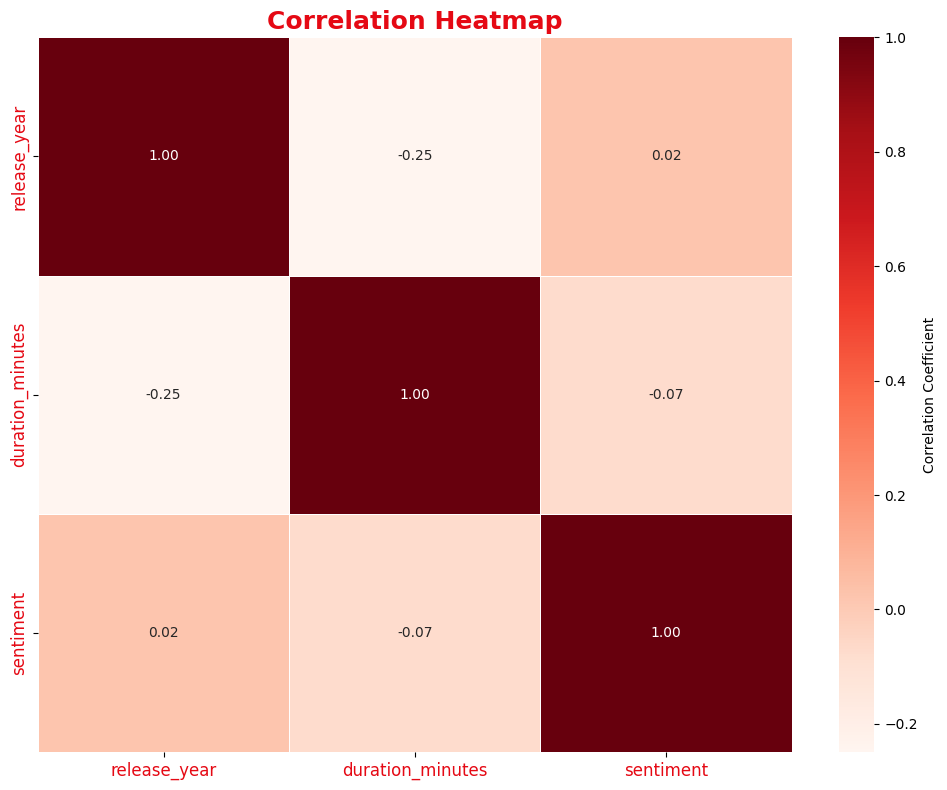

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob

# Ensure required columns exist
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)  # Extract numeric durations
df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else np.nan)  # Compute sentiment polarity

# Select numeric columns for correlation
correlation_data = df[['release_year', 'duration_minutes', 'sentiment']].dropna()

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Reds",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Customizing the heatmap
plt.title("Correlation Heatmap", fontsize=18, color="#E50914", fontweight="bold")
plt.xticks(fontsize=12, color="#E50914")
plt.yticks(fontsize=12, color="#E50914")
plt.gca().set_facecolor("black")
plt.tight_layout()
plt.show()


**What**

This heatmap visualizes the correlation between three variables:

1. release_year: The year the content was released.
2. duration_minutes: The duration of the content in minutes.
3. sentiment: The sentiment polarity (ranging from -1 for negative to +1 for positive) derived from the content descriptions.

Each cell represents the Pearson correlation coefficient, which ranges from -1 (strong negative correlation) to +1 (strong positive correlation).

**Key Observations:**

**Release Year and Duration:**

A weak negative correlation of -0.25 exists between release_year and duration_minutes. This suggests that more recent content tends to have slightly shorter durations, but the relationship is not strong.
Sentiment and Other Variables:

Sentiment has an almost negligible correlation with both release_year (0.02) and duration_minutes (-0.07), indicating that the tone or polarity of content descriptions is largely independent of when the content was released or its duration.

**Duration and Sentiment:**

A very weak negative correlation (-0.07) exists between duration_minutes and sentiment. This suggests no meaningful relationship between how long content is and the tone or sentiment of its description.

**Why**

Understanding Relationships:

The correlations help identify whether variables are linked and can predict or explain each other.
The weak correlations indicate that the three variables are largely independent, meaning they should be analyzed separately rather than together.

**Actionable Insights for Netflix:**

Since release_year and duration_minutes have a weak negative correlation, Netflix may want to analyze audience preferences for shorter content in recent years.
The independence of sentiment suggests that Netflix's content descriptions do not necessarily reflect temporal or duration-based patterns, allowing for more creative freedom in descriptions.

**How**

Release Year vs Duration:

The weak negative correlation suggests that while there’s a slight trend toward shorter content in recent years, it is not substantial enough to drive decisions solely based on duration.
Further analysis (e.g., genre-based trends) might reveal stronger relationships.

**Sentiment Analysis:**

The negligible correlation of sentiment with release_year and duration_minutes indicates that the tone or polarity of descriptions may be influenced by other factors, such as genre or target audience.

**Summary:**
The heatmap reveals that the three variables are largely independent, with no strong correlations. *This suggests*:

Content duration trends do not significantly align with release years.
Sentiment analysis may require a deeper focus on genre, audience, or ratings for meaningful insights.

These findings imply that Netflix's content strategy can treat these variables as separate dimensions while exploring relationships through other factors like genre or region. Let me know if you'd like additional analyses!

###-------***Marks the end of the notebook***------